# Importing required packages

`Pandas`, `numpy`, `seaborn`, `matplotlib.pyplot` and the `surprise` package were used in this assingment. They were saved as pd, np, sns, and plt respectively.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import surprise

# Loading and pre-processing the dataset 

The first step in building a recommender system is loading the dataset. In this codeblock we read the dataset using `pd.read_csv()`, calculate the missing percentage by dividing the amount of missing values calculated using a combination of `.isnull()` and `.sum()` by the length of the dataframe obtained using `len()`. We also determined the amount of unique users and items by calling `.unique()` and taking the length of the resulting series. Some pre-processing steps were applied, including removing the missing values from all columns. We also examine the first 5 rows and the shape of the dataframe using `head()`. The datatypes for columns `userId`, `movieId` and `timestamp` are `integer`. The datatype for the `rating` column is `float`.

In [4]:
dataset = pd.read_csv("MovieLens-Ratings.csv", na_values= -1) 

In [5]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
unique_users = len(dataset['userId'].unique())
unique_movies = len(dataset['movieId'].unique())
print('Missing values: ' + str(round(percent_missing['rating'], 2)) + '%')

print('Unique users: ' + str(unique_users))
print('Unique movies: ' + str(unique_movies)+ '\n')

dataset = dataset.dropna(axis= "index")

print(f"Shape of the dataframe {dataset.shape}")
print(f"Column types: \n{dataset.dtypes} \n")
print("First 5 rows of the dataframe: \n")

dataset.head(5)

Missing values: 0.0%
Unique users: 283228
Unique movies: 53889

Shape of the dataframe (27753444, 4)
Column types: 
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object 

First 5 rows of the dataframe: 



,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## Converting the timestamps to datetime and adding year and month columns

In addition to handling missing values, we also added a datetime column by using `pd.to_datetime()`, two additional columns were created for the year and month using the `strftime()` method. The dataframe now contains a total of seven columns. The data type of the newly added columns are `object`. The first 5 rows of the updated dataframe is shown below.

In [6]:
dataset["datetime"] = pd.to_datetime(dataset.timestamp, unit = "s" , origin = "unix")  
dataset["year"] = dataset.datetime.dt.strftime("%Y")               
dataset["month"] = dataset.datetime.dt.strftime("%B")                  
print(f"Shape of the dataframe after adding new columns {dataset.shape}")
print(f"Column types: \n{dataset.dtypes} \n")
print("First 5 rows of the resulting dataframe: \n")
dataset.head(5)

Shape of the dataframe after adding new columns (27753444, 7)
Column types: 
userId                int64
movieId               int64
rating              float64
timestamp             int64
datetime     datetime64[ns]
year                 object
month                object
dtype: object 

First 5 rows of the resulting dataframe: 



,userId,movieId,rating,timestamp,datetime,year,month
0,1,307,3.5,1256677221,2009-10-27 21:00:21,2009,October
1,1,481,3.5,1256677456,2009-10-27 21:04:16,2009,October
2,1,1091,1.5,1256677471,2009-10-27 21:04:31,2009,October
3,1,1257,4.5,1256677460,2009-10-27 21:04:20,2009,October
4,1,1449,4.5,1256677264,2009-10-27 21:01:04,2009,October


# Summary statistics and missing sparsity

The second step is to compute overall summary statistics, including the mean, median, min, max, standard deviation and percentiles, for both the rating and the movie count. These statistics helps us to understand the central tendency and spread of the data. Additionally, the mean rating per user and the mean rating per movie was calculated to examine sparsity in the dataset. These calculations were done using: `value_counts()`to determine the unique values in each column; `min(), max(), mean(), median() and std()` to calculate minimum and maximum value, mean, median, and standard deviation for the set of value counts. The `np.percentile()`-function was used to calculate the percentiles for each set of value counts in the  `movieId`, `UserId` and `year` columns.

In [24]:
ratings = dataset['rating']
print(f"Mean rating for movies: {ratings.mean():.2f}") 
print(f"Median rating for movies: {ratings.median():.2f}")
print(f"Min rating for movies: {ratings.min():.2f}")
print(f"Max rating for movies: {ratings.max():.2f}")
print(f"Std rating for movies: {ratings.std():.2f}")

user_counts = dataset['userId'].value_counts()
print(f"\nUnique users: {len(dataset['userId'].unique())}")
print (f"Average amount of reviews for each user: {user_counts.mean():.2f}")
print (f"Median amount of reviews for each user: {user_counts.median():.2f}")
print (f"Lowest amount of reviews for a single user: {user_counts.min()}")
print (f"Highest amount of reviews for a single user: {user_counts.max()}")
print(f"Std rating for amount of reviews for each user: {user_counts.std():.2f} \n")
percentiles = np.percentile(user_counts, [25, 50, 75, 90])
print(f"Percentiles reviews per user:")
print(f"25th Percentile: {percentiles[0]}\n" +
      f"50th Percentile (Median): {percentiles[1]}\n" +
      f"75th Percentile: {percentiles[2]}\n"+
      f"90th Percentile: {percentiles[3]}\n" )

movie_counts = dataset['movieId'].value_counts()
print(f"Unique movies: {len(dataset['movieId'].unique())}")
print (f"Average amount of reviews for each movies: {movie_counts.mean():.2f}")
print (f"Median amount of reviews for each user: {movie_counts.median():.2f}")
print (f"Lowest amount of reviews for a single user: {movie_counts.min()}")
print (f"Highest amount of reviews for a single user: {movie_counts.max()}")
print (f"Std rating for amount of reviews for each movie: {movie_counts.std():.2f}\n")
percentiles = np.percentile(movie_counts, [25, 50, 75, 90])
print(f"Percentiles reviews per movie:")
print(f"25th Percentile: {percentiles[0]}\n" +
      f"50th Percentile (Median): {percentiles[1]}\n" +
      f"75th Percentile: {percentiles[2]}\n"+
      f"90th Percentile: {percentiles[3]}\n" )

year_counts = dataset['year'].value_counts()
print(f"Reviews were collected during the period of: {dataset.datetime.min().strftime('%x')} and {dataset.datetime.max().strftime('%x')}.")
print(f"Average amount of reviews each year: {year_counts.mean():.2f}")
print(f"Median amount of reviews each year: {year_counts.median():.2f}")
print(f"Lowest amount of reviews each year: {year_counts.min():.2f}")
print(f"Highest amount of reviews each year: {year_counts.max():.2f}")
print(f"Std rating amount of reviews each year: {year_counts.std():.2f}\n")
percentiles = np.percentile(year_counts, [25, 50, 75, 90])
print(f"Percentiles reviews per year:")
print(f"25th Percentile: {percentiles[0]}\n" +
      f"50th Percentile (Median): {percentiles[1]}\n" +
      f"75th Percentile: {percentiles[2]}\n" +
      f"90th Percentile: {percentiles[3]}\n" )


Mean rating for movies: 3.53
Median rating for movies: 3.50
Min rating for movies: 0.50
Max rating for movies: 5.00
Std rating for movies: 1.07

Unique users: 283228
Average amount of reviews for each user: 97.99
Median amount of reviews for each user: 30.00
Lowest amount of reviews for a single user: 1
Highest amount of reviews for a single user: 23715
Std rating for amount of reviews for each user: 212.76 

Percentiles reviews per user:
25th Percentile: 15.0
50th Percentile (Median): 30.0
75th Percentile: 95.0
90th Percentile: 240.0

Unique movies: 53889
Average amount of reviews for each movies: 515.01
Median amount of reviews for each user: 7.00
Lowest amount of reviews for a single user: 1
Highest amount of reviews for a single user: 97999
Std rating for amount of reviews for each movie: 2934.76

Percentiles reviews per movie:
25th Percentile: 2.0
50th Percentile (Median): 7.0
75th Percentile: 48.0
90th Percentile: 531.0

Reviews were collected during the period of: 9-1-1995 and 2

### Rating distribution
Users tend to rate movies slightly above the average. A mean rating of 3.53 and a median of 3.5 suggests a symmetric distribution. However, there can be a slight skew towards higher ratings, as the max rating is goes up to 5.0 stars. A standard deviation of 1.07 tells us that there is moderate variability in user ratings, which is ideal for collaborative methods.

### User activity and sparsity
The standard deviation in reviews per user is 212.76, indicating a high variability in user activity. While only a small number of users are highly active, the median of number of reviews per user is only 30, suggesting that most users have relatively low interactions. This imbalance highlights a data sparsity issue.

### Movie Popularity
Only a few movies receive high numbers for rankings (up to 97,999), while the numbber for reviews per movie is only 7. This indicates that the majority of movies have limited user interactions, wjich can lead to popularity bias in recommender models.

### Trends over time
The dataset spans over a period of 23 years (1995-2018), with fluctuations of 544,840 rankings over time.


# Exploratory Data Analysis
The next step is to conduct some exploratory data analysis to visualize key statistics and gain a better understanding of the data. The function in the codeblock returns a dataframe consisting of data that is in the top-k most common values of a selected column. It first gets the value counts of a specific column, selects the `k` largest using `nlargest()` and saves these values. The function then returns a dataframe where the specified column matches one of the saved values by using `isin()`.

In [25]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.6, rc={"lines.linewidth": 2})

def select_k(df, k, column):
    top_k =  df[column].value_counts().nlargest(k).index                                                       
    return df.loc[df[column].isin(top_k)]

## User activity

Two histograms of the number of ratings per user were generated to visualize the distribution of user activity, one with a normal scaled y-axis and one with a log-scaled y-axis to get a better visualization of the number of ratings per user. A seperate histogram highlighting the top 10 most active users and a boxplot of reviews per user were also generated to better understand the spread of user activity and identify potential outliers. The figure was created with `plt.sublots()` which allows for inserting subfigures into itself. It creates the `axes` variable which is used to insert the different graphs into the different positions of the figure. The `.hist` method for the axes variable is used to create the histograms along with `sns.countplot()`. The `set_title()-, set_xlabel()-, set_ylabel() and .tick_params` methods are used to change the titles, x- and y-labels and the ticks for a specific axes of the subfigures. 

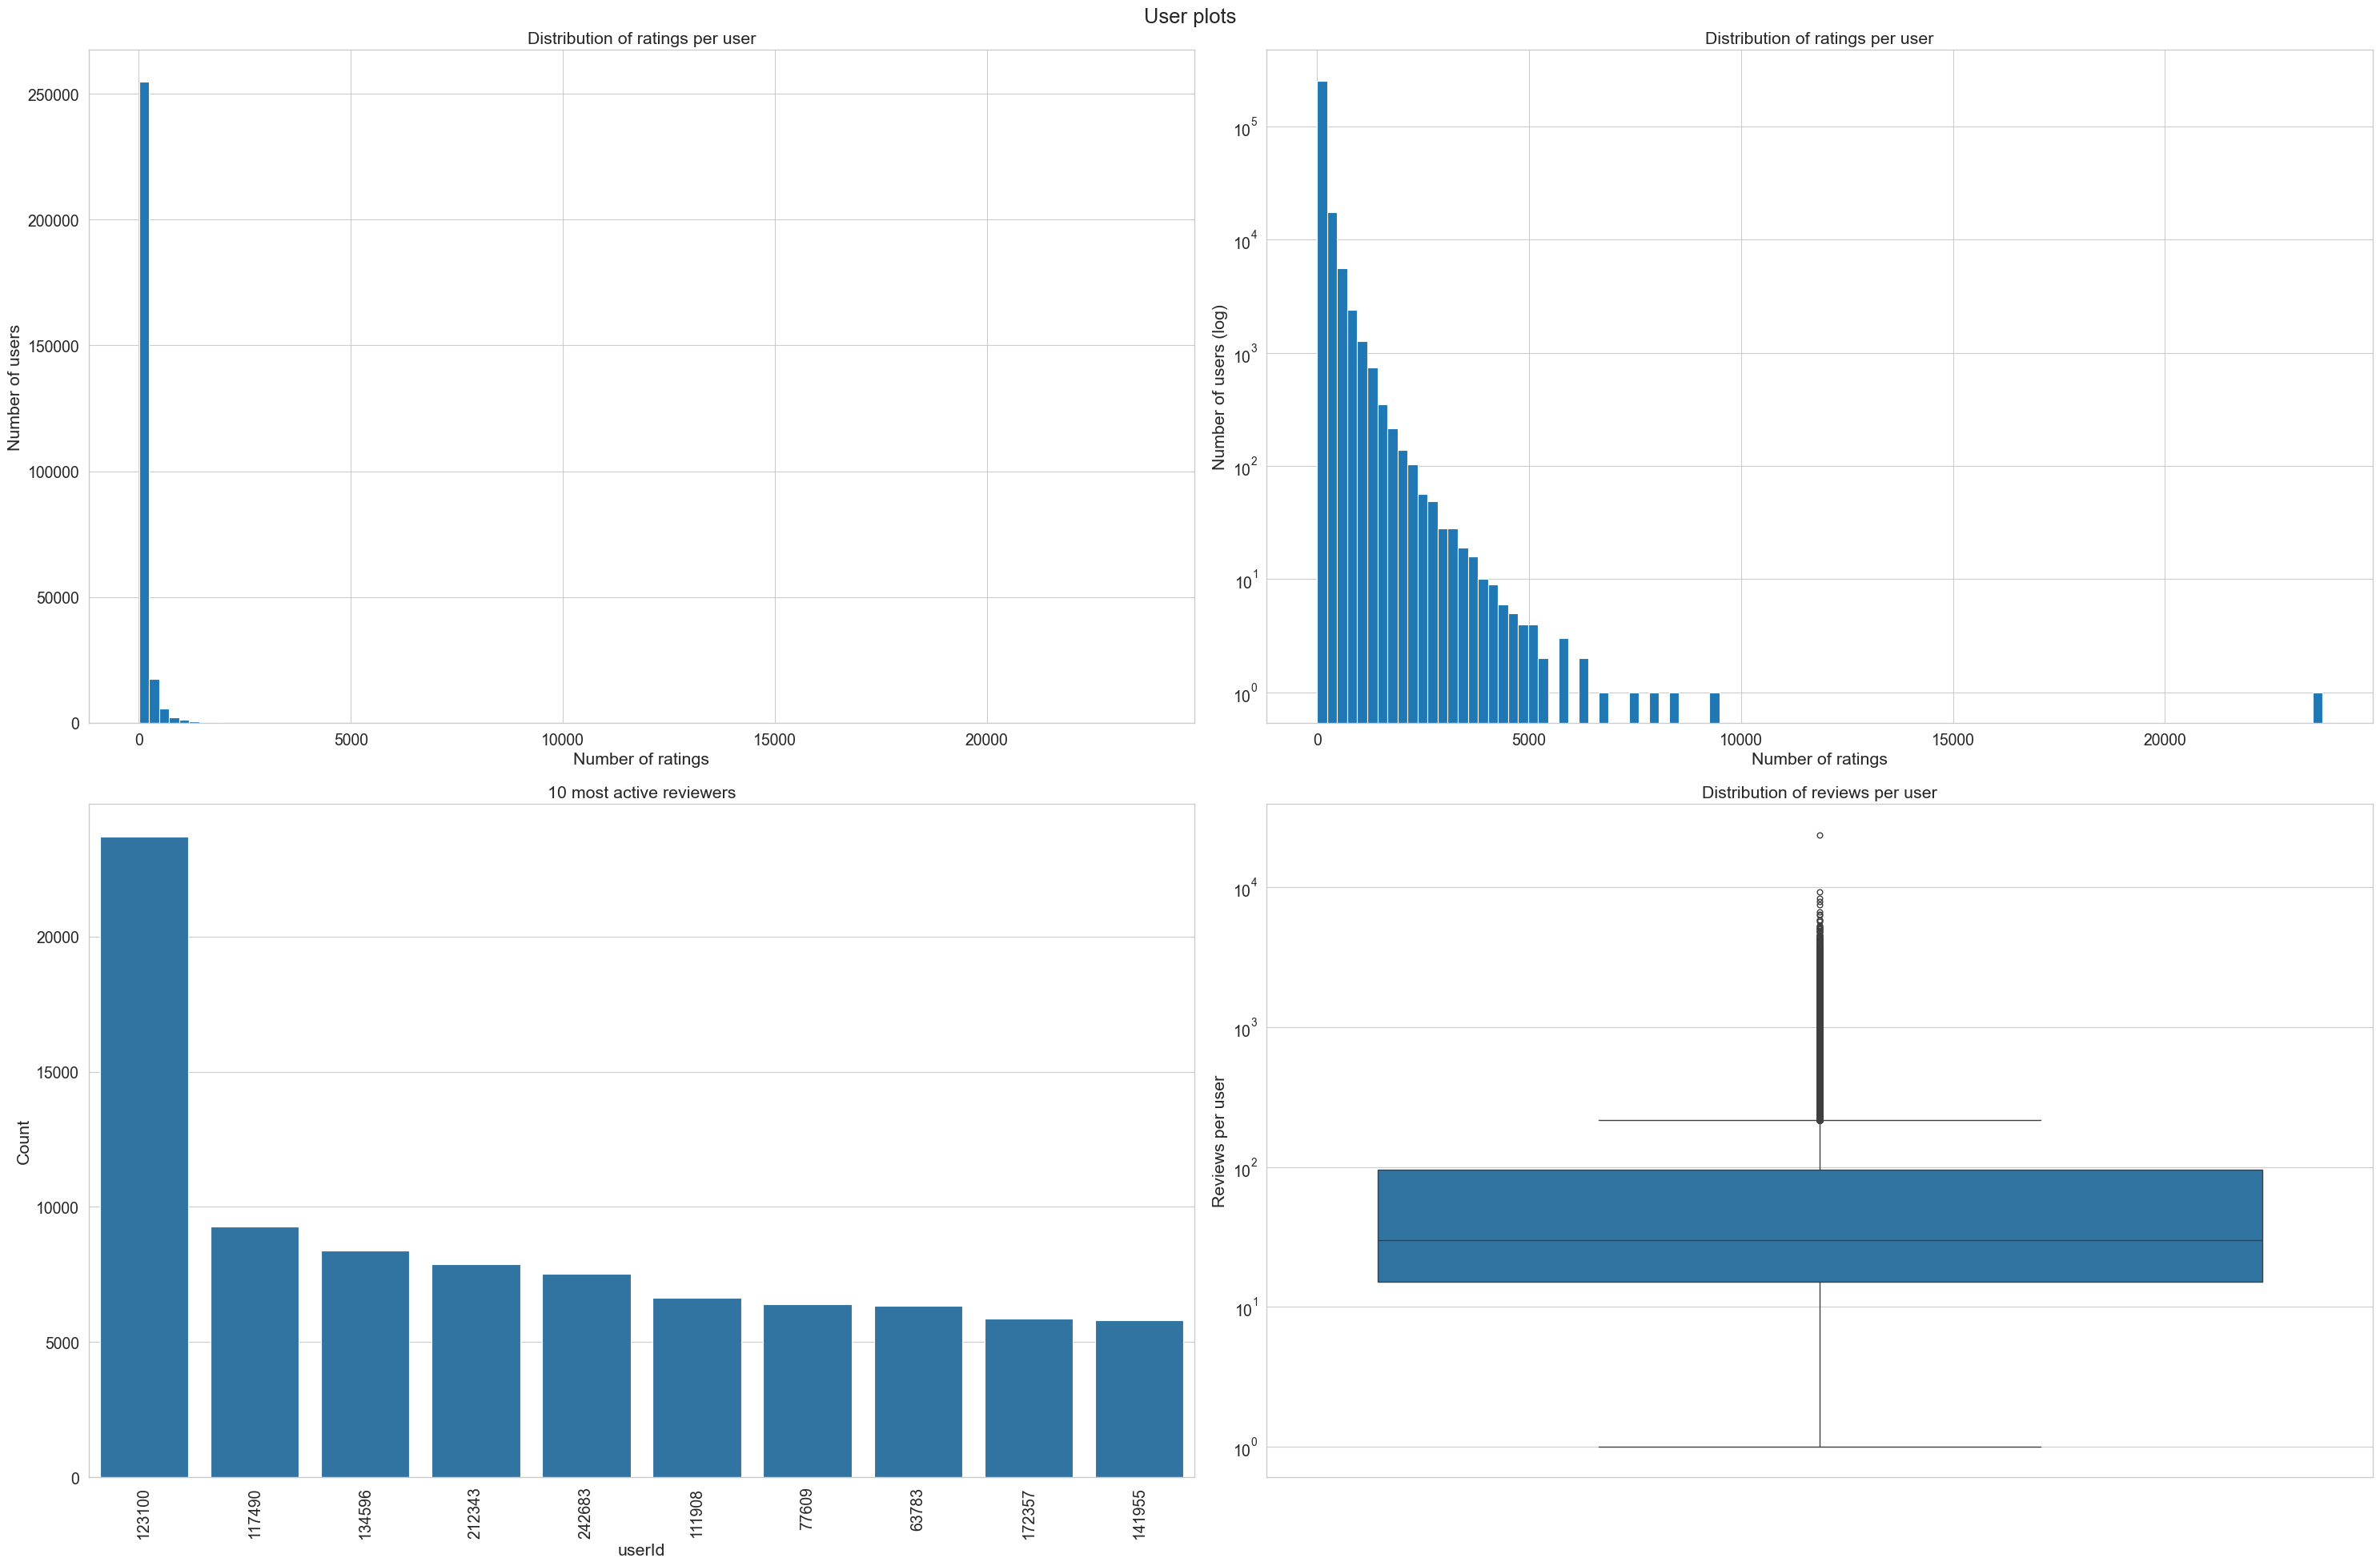

In [39]:
user_rating_count = dataset['userId'].value_counts()
fig, axes = plt.subplots(2,2, figsize = (30,20))                         
fig.suptitle("User plots")
axes[0,0].set_title("Distribution of ratings per user")
axes[0,0].set_ylabel("Number of users")                                           
axes[0,0].set_xlabel("Number of ratings")
axes[0,0].hist(user_rating_count, bins = 100)

axes[0,1].set_title("Distribution of ratings per user")
axes[0,1].set_ylabel("Number of users (log)")                                           
axes[0,1].set_xlabel("Number of ratings")
axes[0,1].hist(user_rating_count, bins = 100, log = True)

new_dataset = select_k(dataset, 10 ,column= "userId")                                                                     
axes[1,0].set_title(f"10 most active reviewers")                                                                            
sns.countplot(data = new_dataset, x = 'userId', ax = axes[1,0], order = new_dataset["userId"].value_counts().index)     
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_ylabel("Count")  

vote_freq = pd.DataFrame([ dataset.userId.value_counts().values])
vote_freq = vote_freq.transpose().rename(columns={0 : ""})
axes[1,1].set_title(f"Distribution of reviews per user")  
counts = sns.boxplot(data =  vote_freq, ax= axes[1,1]).set_yscale('log')
axes[1,1].set(xlabel=None)
axes[1,1].set(ylabel="Reviews per user")

plt.tight_layout()  


## Ratings

Two histograms were generated: one in linear scale and one in log scale, to visualize the distribution of ratings per movie. A countplot was then created to display the rating distribution. Finally, a boxplot of the rating distribution was included to illustrate the central tendency and identify potential outliers.

<Axes: title={'center': 'Boxplot of ratings'}, xlabel='Rating'>

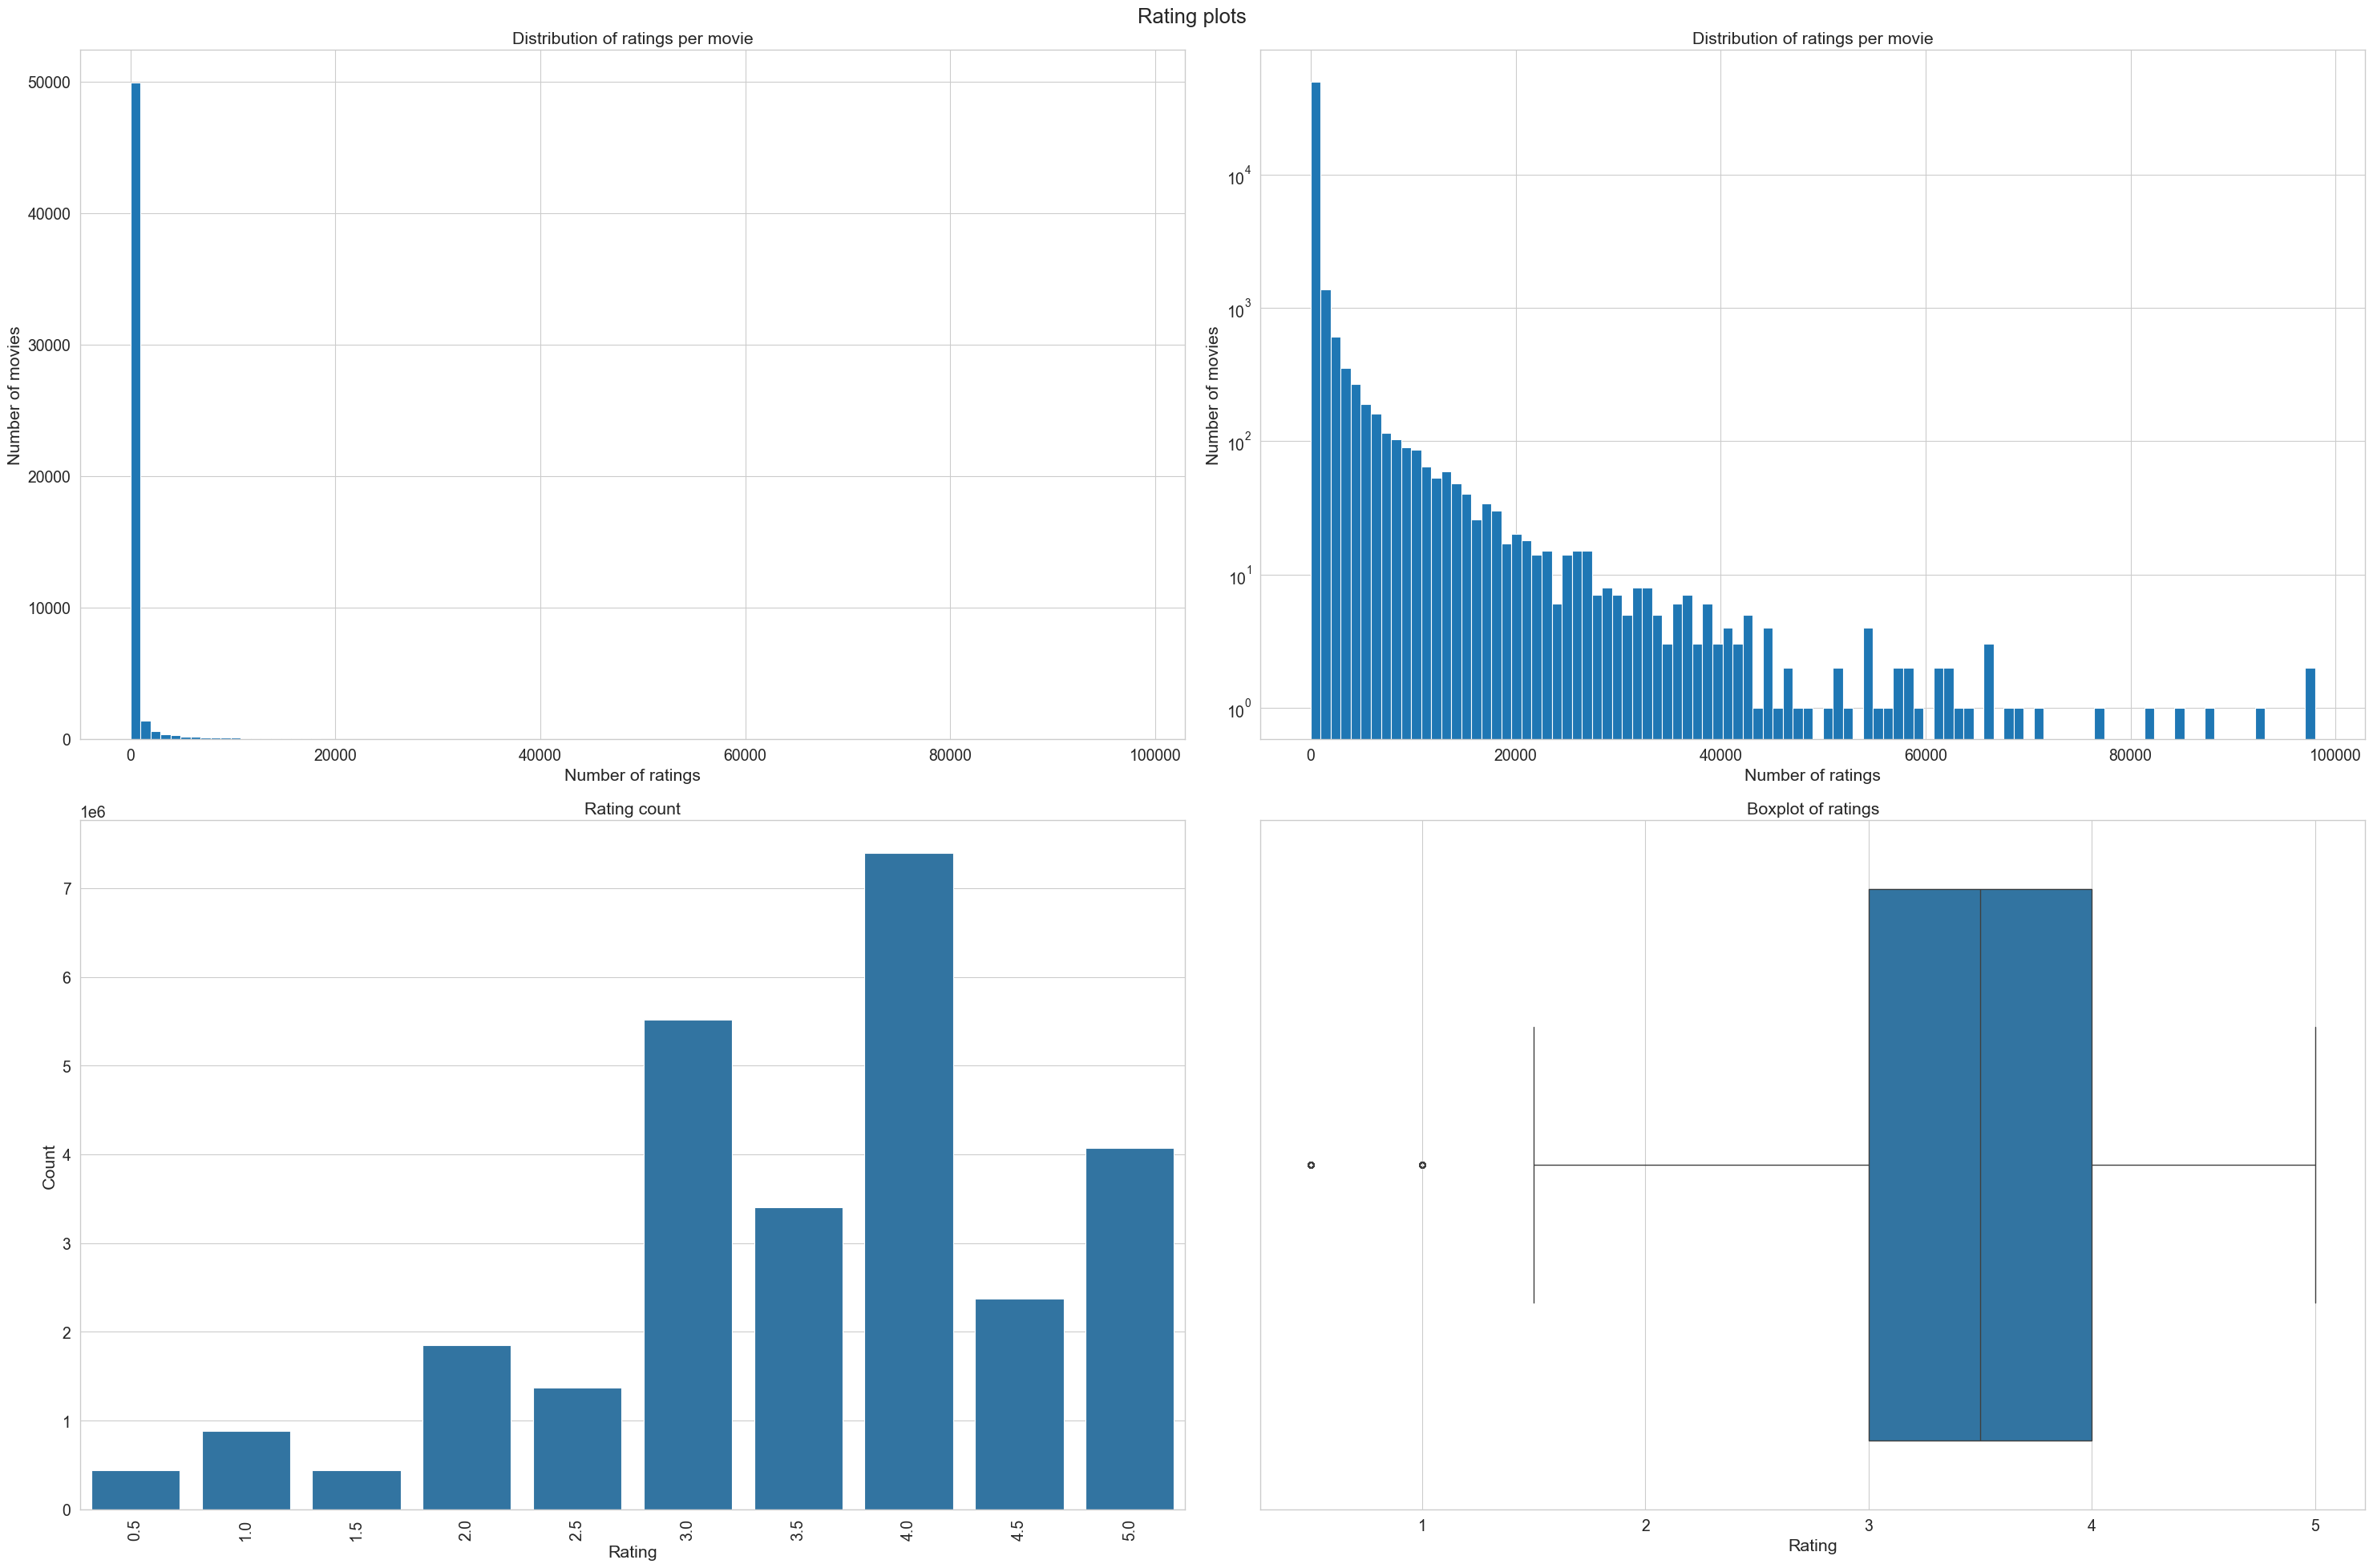

In [40]:
movie_rating_count = dataset['movieId'].value_counts()
fig, axes = plt.subplots(2,2, figsize = (30,20))   
fig.suptitle("Rating plots")   
axes[0, 0].set_title("Distribution of ratings per movie")
axes[0, 0].set_ylabel("Number of movies")                                           
axes[0, 0].set_xlabel("Number of ratings")
axes[0, 0].hist(movie_rating_count, bins = 100)

axes[0, 1].set_title("Distribution of ratings per movie")
axes[0, 1].set_ylabel("Number of movies")                                          
axes[0, 1].set_xlabel("Number of ratings")
axes[0, 1].hist(movie_rating_count, bins = 100, log = True)

rating_order = [0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
axes[1, 0].set_title(f"Rating count") 
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xlabel("Rating")                                                                                         
sns.countplot(data = dataset, x = 'rating', ax = axes[1, 0], order = rating_order)                        
axes[1, 0].tick_params(axis='x', rotation=90)                                                                              
plt.tight_layout()

axes[1, 1].set_title(f"Boxplot of ratings")
axes[1, 1].set_xlabel("Rating")
sns.boxplot(x= dataset['rating'], ax= axes[1, 1])    


The analysis shows that popularity bias is present, where a very small number of (popular) movies have high user interactions, while the vast majority received relatively few ratings. The countplot and boxplot confirms a slight skew towards the positive side, suggesting a tendency towards higher ratings, with the majority of ratings being 4.0. To not overestimate these high ratings, standardizing with Z-score normalization could be helpful for model building.

## Movies

More plots were generated to better understand the distribution of movie ratings and the frequency of movie interactions. The probability density of all items was computed to visualize the frequency of movie ratings, along with a log-scale version of the probability density in a seperate plot. A third plot was generated to show the relative frequency of the top 4000 movies, and a final boxplot to show the rating distribution of the top 10 most reviewed movies. The probability density functions were created using `sns.histplot(kde = True)`, where the `kde` is set to `True`. The relative frequency plot is created by taking the value counts of `movieId`, calculating the relative frequency of the `n_top` most reviewed movies and displaying it using `sns.lineplot()` in combination with `.fill_between()` to create a lineplot in which the space underneath the curve is filled in.

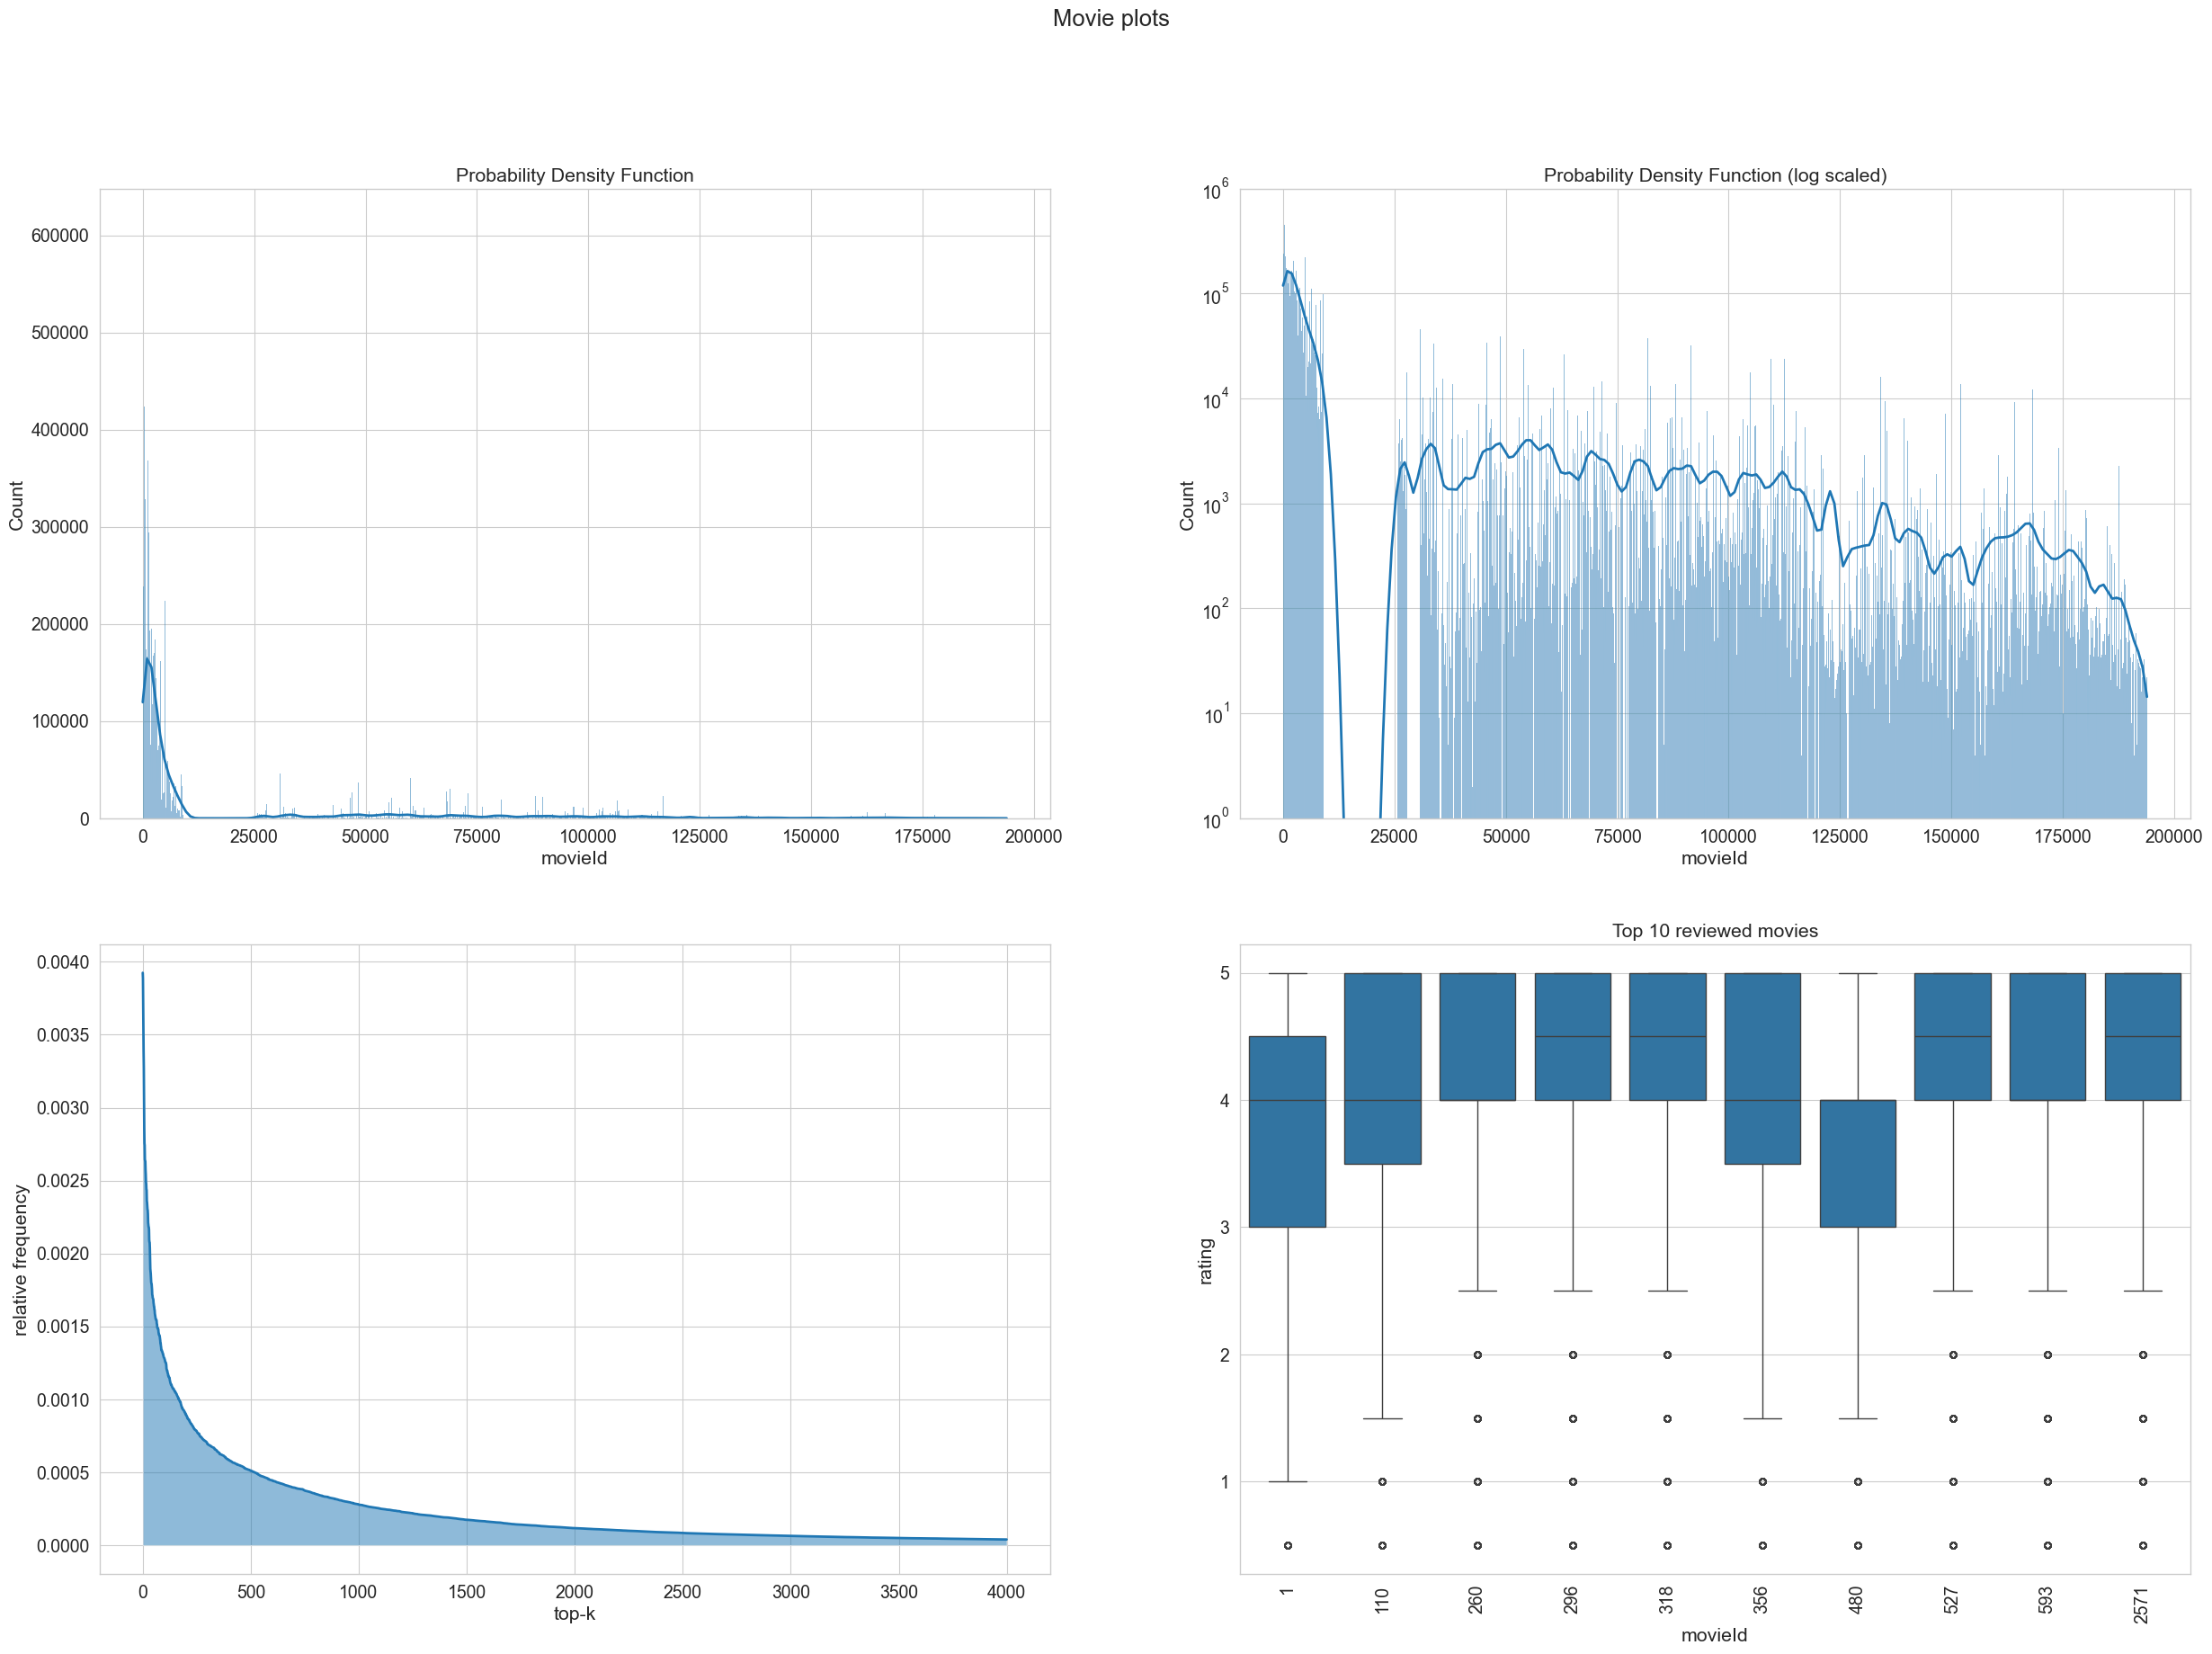

In [41]:
fig, axes = plt.subplots(2,2, figsize = (30,20))   
fig.suptitle("Movie plots")
axes[0, 0].set_title("Probability Density Function")    
sns.histplot(dataset['movieId'], kde=True, ax=axes[0, 0])

axes[0, 1].set_title("Probability Density Function (log scaled)")
sns.histplot(dataset['movieId'], kde=True, ax=axes[0, 1]).set_yscale("log")
axes[0, 1].set_ylim(bottom = 1, top = 1000000)

counts = dataset['movieId'].value_counts(sort=True, ascending=False)
orig = counts.index.tolist()
counts2 = counts.reset_index(inplace=False, drop=True)
sub = counts2.index.tolist()
n_top = 4000
sns.lineplot(x=counts2.index[0:n_top], y=counts2[0:n_top]/counts2[0:n_top].sum(), ax=axes[1,0])
axes[1,0].fill_between(counts2.index[0:n_top], counts2[0:n_top]/counts2[0:n_top].sum(), alpha=0.5)
axes[1,0].set_ylabel("relative frequency")
axes[1,0].set_xlabel("top-k")

k = 10
top_k = dataset["movieId"].value_counts().head(10)
top_k_list = dataset["movieId"].value_counts().head(10).index.tolist()
top = dataset[dataset['movieId'].isin(top_k_list)].groupby("movieId")["rating"].mean()
top_df = dataset[dataset['movieId'].isin(top_k_list)]

sns.boxplot(x = "movieId", y = "rating", data= top_df, ax = axes[1,1])
axes[1,1].set_title(f"Top {k} reviewed movies")
axes[1,1].tick_params(axis='x', rotation=90)    




The probability density plot reveals that most movies are sparsely rated, confirming that popularity bias is present. A small number of movies dominate the dataset, while the majority have only a few interactions compared to the popular movies. The relative frequency plot shows that the top 3500 movies have the most interactions, movies beyond the top 3500 have far less interactions. The boxplot demonstrates that the top 10 most reviewed movies receive high ratings, with an average around 4 out of 5 stars. Using these items may introduce popularity bias in the model as well. This can reduce the model's generalization and lead to less accurate prediction.

## Temporal Analysis of Rating activity


The temporal distribution of user review was visualized by year (1995-2018) and by month, to identfiy patterns and trends in user engagement over time.

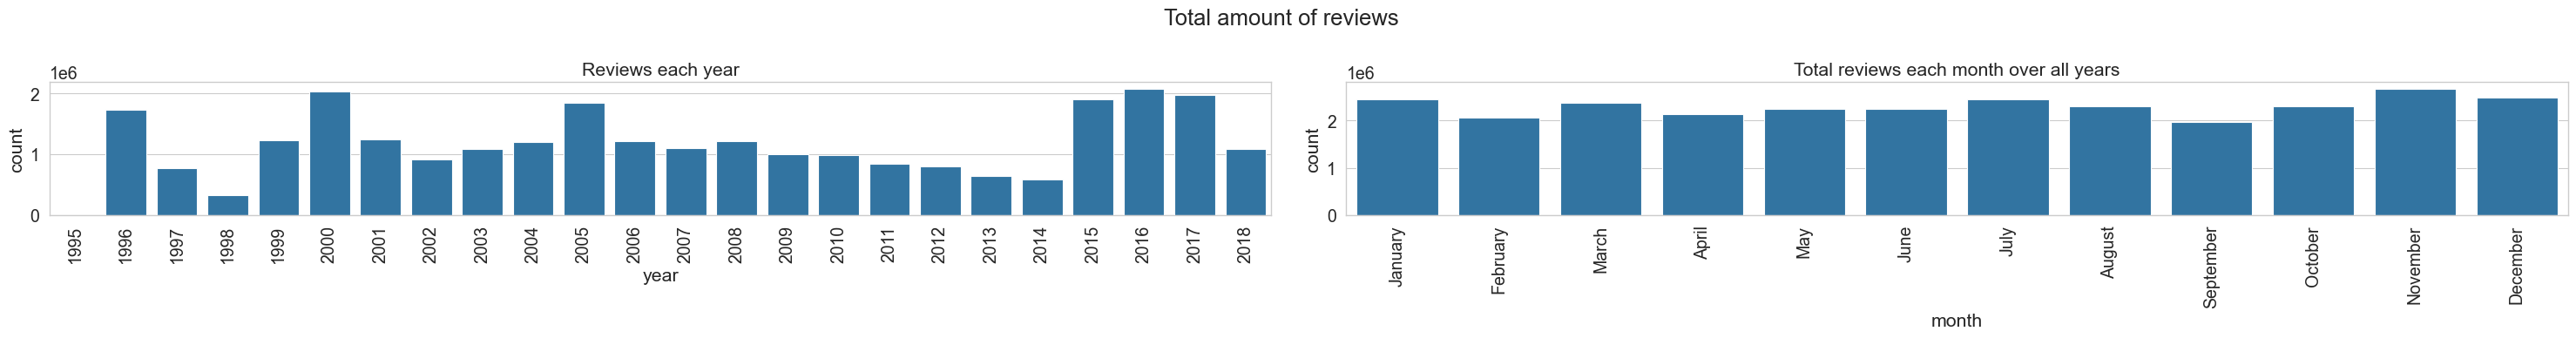

In [43]:
def create_time_graph(df = dataset): 
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",  "November" , "December"]   
    fig, axes = plt.subplots(1,2, figsize = (30,4))                                                                     
    fig.suptitle("Total amount of reviews")                                                                            
    # Creates graph for amount of reviews each year
    axes[0].set_title(f"Reviews each year")                                                                            
    sns.countplot(data = dataset, x = 'year', ax = axes[0], order=dataset.year.value_counts().sort_index().index)       
    axes[0].tick_params(axis='x', rotation=90)                                                                         
    # Creates graph for total reviews in a month among all years
    axes[1].set_title(f"Total reviews each month over all years")                                                      
    sns.countplot(data = df, x = 'month', ax = axes[1], order=month_order)                                         
    axes[1].tick_params(axis='x', rotation=90)                                                                          
    plt.tight_layout()                                                                                                  
create_time_graph()

The left plot shows 6 peaks in a span of 18 years. 2015 and 2016 saw the highest levels of activity, with over 2 million reviews in each year. The dataset is dense enough across time for temporal modeling.

# Data preperation

Data preperaion was carried out based on the insights from exploratory data anlysis. The top 3500 items were selected for sampling, and the dataset was further dwonsdampled to 1% for computation efficiency. The `datetime` column was kept in the resulting dataframe. The function in the codeblock takes an input dataframe and returns a dataframe of the original size*sample percentage with only data belonging to to `top_k` most reviewed movies.

In [45]:
def pre_process(df = dataset, top_k = 3500, sample_percentage = 1, sampling = "random", keep_datetime = True):      
    if sampling == "random":                                                                                        
        new_dataset = select_k(df, top_k ,column= "movieId")                                                        
        print(f"Amount of movies in new dataset before applying sampling: {len(new_dataset.movieId.value_counts())}")   
        print(f"Amount of user in new dataset before applying sampling: {len(new_dataset.userId.value_counts())}")      
        print(f"Rows in new dataset before applying sampling: {new_dataset.shape[0]}")                                  
        new_dataset = new_dataset.sample(frac= sample_percentage/100, random_state= 10)                                 
        print(f"Amount of movies in new dataset after applying sampling: {len(new_dataset.movieId.value_counts())}")    
        print(f"Amount of user in new dataset after applying sampling: {len(new_dataset.userId.value_counts())}")       
        print(f"Rows in new dataset after applying sampling: {new_dataset.shape[0]}")                                   
        if keep_datetime == True:                                                                           
            return new_dataset[["userId", "movieId", "rating", "datetime"]]
        else:
            return new_dataset[["userId", "movieId", "rating"]]
new_df = pre_process(keep_datetime= False)

Amount of movies in new dataset before applying sampling: 3500
Amount of user in new dataset before applying sampling: 282652
Rows in new dataset before applying sampling: 24425818
Amount of movies in new dataset after applying sampling: 3500
Amount of user in new dataset after applying sampling: 104552
Rows in new dataset after applying sampling: 244258


## Baseline model

For the normal predictor, we used `Reader()` to parse the dataframe containing the ratings, created a proper dataset for feeding the model using the Dataset class in combination with the `.load_from_df()`. We created a cross-validation iterator and set its settings using `KFold()` and did the actual cross-validation for the `NormalPredictor()` using the `cross_validate()` function. The average test RMSE was 1.44

In [49]:
from surprise import Dataset
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection.split import KFold

reader = Reader(rating_scale= (0.5, 5))     #Creates a reader with the appropriate rating_scale
data = Dataset.load_from_df(new_df, reader) # Creates proper dataset for feeding the recommender system algo
cv = KFold(n_splits = 5, random_state= 10, shuffle= True) # Creates the settings for the cross_validation

results = cross_validate(NormalPredictor(), data, cv=cv, return_train_measures= True)
print(f"Average train rmse: {results['train_rmse'].mean()} over 5 folds")
print(f"Average test rmse: {results['test_rmse'].mean()} over 5 folds")

Average train rmse: 1.4360084811436111 over 5 folds
Average test rmse: 1.4348706962893691 over 5 folds


# K-Nearest-Neighbours (KNN)
The K-Nearest-Neighbours (KNN) method is a memory-based collaborative filtering algorithm that predicts outputs by identifying the most similar data points to a given input. The algorithm measures proximity between two data points using a distance metric or a similarity function. Predictions are made by aggregating the values of the nearest neighbours through regression or classification depending on the rating scale.In this project, two different variations of the KNN-method are used: KNNBasic and KNNWithZScore. KNNBasic uses raw rating values to make predictions, while KNNWithZScore adds a z-score normalization to the ratings first. Normalizing helps account for an individual user’s rating variability, making it more robust to rating scale differences amongst users.KNN-algorithms involve several hyperparameters, such as the number of neighbours, the minimum support threshold, the similarity measure and if the model is item-based or user-based. 
In this assignment, the hyperparamaters to be optimized are the number of neighbours, the similarity measure and the minimum support threshold. The hyperparameters are explained below:
- The number of neighbours (`k`) defines how many similar data points (neighbours) are compared to an instance when classifying. A larger number of neighbours can be good for generalization of the model but too high can cause inaccurate predictions. A smaller number of neighbours can improve predictions but may lead to overfitting.
- The minimum support threshold (`min_sup`) defines the minimum amount of ratings two data points must have in common for them to be considered a valid similarity. This helps filter the data on unreliable data points or noise.
- A similarity measure is a mathematical function that quantifies how close two data points are based on their rating pattern. In this assignment, three measures are used: Pearson’s correlation, Mean Squared Difference (MSD) and cosine similarity. The Pearson’s correlation measures the linear correlation between two data points. The MSD gives the inverse of the mean squared difference between ratings. The cosine similarity measures the cosine of the angle between two vectors. Careful consideration should be given to the choice of this measure, as it can affect the performance depending on the scale of the features.

# Singular Value Decomposition (SVD)
The second selected method applies matrix factorization using Singular Value Decomposition (SVD), a model-based collaborative filtering technique typically used in recommender systems. This technique uncovers latent features in user feedback. The main idea of this method is to decompose a high-dimensional interaction matrix into multiple lower-dimensional matrices that contain latent features. These latent matrices are then multiplied to reconstruct the full matrix.
In this project, two variations of the SVD method are used: standard SVD and SVD++. Both are based on latent factor models; however, SVD++ also incorporates implicit feedback by considering which movies a user chooses to rate, not just the ratings themselves; this allows the algorithm to fill gaps when data is absent. As a result, SVD++ can make accurate predictions even with large missing entries, making it particularly useful when dealing with sparse datasets. SVD-models involve several hyperparameters, such as the number of factors, the number of epochs, the learning rate and the regularization factor. These parameters are described below:
- The number of factors (`n_factors`) determines the dimensionality of the latent space in which the users and items are embedded. Each factor shows a concept influencing user preferences, like certain implicit preferences. More factors can capture complex user-item interactions but risk overfitting if this is unsupported by the volume of data.
- The number of epochs (`n_epochs`) defines how many times the algorithm is passed over the (training) dataset during finetuning. A larger number of epochs can help in optimizing the model but i fit is too large, it will overfit.
- The learning rate (`lr_all`) determines how big the step is that the model parameters are adjusted during training. A larger learning rate may speed up the process, but it may also cause divergence or oscillations and causes the model to go past the optimal values. A smaller learning rate yields smoother convergence on large, noisy datasets but may increase the training time.
- The regularization factor (`reg_all`) punishes large parameter values to prevent overfitting, especially when factor dimensionality is high. Finding the right value is crucial for balancing the flexibility and generalization ability of a model.

**Explanations of steps:**

- **Why we sampled:** The original data set contained many missing ratings as seen in the EDA. Reducing sparsity enhances the signal-to-noise ratio by focusing on denser submatrices, as per frequent itemset theory.
- **Why top-k-movies:** Filtering the top most-rated movies removed the “long tail” movies with relatively little interactions from users. These contribute disproportionately to overfitting and high variance in latent factors.
- **Why 5-Fold CV:** Per evaluation of the best practices, k-fold cross-validation reduces the influence of any single train/test split, yielding a more reliable RMSE estimate. This is because each fold’s independent weight-updates test the model’s stability. Consistent RMSE-values across folds are an indication of robust factor generalization.

## Evaluation measure

To determine the accuracy of a model’s prediction we used the Root Mean Squared Error (RMSE). This is the root of the average squared difference between a predicted value from the model and the actual value in the dataset. We want this to be as low as possible.

# KNNBasic
Starting with the normal predictor baseline, which had an RMSE of 1.4349, we tested out various configurations of neighbourhood-based models. KNNBasic was the first model to be tested and finetuned. For the preprocessing data, we explored two different sampling sizes of 2% and 4%; two different amounts of top movies of 4000 and 5000; and two minimal ratings of 5 and 10. For the hyperparameters, we adjusted our model with different values of neighbourhoods, ranging from 16 to 25; minimal support, ranging from 5 to 12; and Pearson’s correlation, cosine and MSD (Euclidean Distance) as similarity measures. We adjusted these parameters incrementally by running grid search cross-validation with different hyper parameters settings.

Newer models were tested using a combination of the best performing hyper parameters in previous tests, eventually narrowing down on the range of values different hyper parameters could take and achieving optimal test RMSE. The results of different tests found the best RMSE to be 1.0345. This was obtained using 18 neighbours, minimal support of 10 and the Pearson similarity tested over a sampling size of 2% of the top 4000 movies, with each user having a minimum of 10 ratings.


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import GridSearchCV, KFold
from surprise.accuracy import rmse
import time

# --- Required Function Definitions ---
def select_k(df, k_items, column="movieId"):
    """Selects the k_items most frequent items in a specific column."""
    return df.loc[df[column].isin(df[column].value_counts().nlargest(k_items).index)]

def pre_process(df, top_k_movies=4000, sample_percentage=1, 
                min_ratings_per_user=5, random_state_value=42):
    """
    Pre-processes the dataset:
    - Selects top_k_movies most rated movies.
    - Takes a sample of the specified percentage (with random_state for reproducibility).
    - Filters out users with fewer than min_ratings_per_user in the sample.
    """
    print(f"\n--- Pre-processing Started: Top {top_k_movies} movies, {sample_percentage}% sample, min {min_ratings_per_user} ratings per user ---")
    df_top_movies = select_k(df, top_k_movies, column="movieId")
    print(f"After selecting top {top_k_movies} movies: {len(df_top_movies.movieId.unique())} movies, {df_top_movies.shape[0]} ratings remaining.")
    
    df_sampled = df_top_movies.sample(frac=sample_percentage/100.0, random_state=random_state_value)
    print(f"After taking {sample_percentage}% sample: {df_sampled.shape[0]} ratings remaining.")
    print(f"Movies in sample: {len(df_sampled.movieId.unique())}")
    print(f"Users in sample (before filtering): {len(df_sampled.userId.unique())}")
    
    if min_ratings_per_user > 0:
        user_rating_counts = df_sampled['userId'].value_counts()
        active_users = user_rating_counts[user_rating_counts >= min_ratings_per_user].index
        df_final_sample = df_sampled[df_sampled['userId'].isin(active_users)]
        print(f"After filtering users with less than {min_ratings_per_user} ratings:")
        print(f"Users remaining: {len(df_final_sample.userId.unique())}, Ratings remaining: {df_final_sample.shape[0]}")
    else:
        df_final_sample = df_sampled
        
    if df_final_sample.empty:
        print("WARNING: DataFrame is empty after filtering. Check parameters.")
        return df_final_sample
        
    return df_final_sample[["userId", "movieId", "rating"]]

# --- Step 5: Testing with top_k_movies = 5000 ---
# (Keeping sample_percentage = 2% and min_ratings_user = 10)

print("\n--- Step 5: Testing with top_k_movies = 5000 ---")

if 'dataset' not in locals() or not isinstance(dataset, pd.DataFrame) or dataset.empty:
    print("ERROR: 'dataset' DataFrame is not loaded or is empty. Please load your data first.")
else:
    # 1. Data Preparation Parameters for this Step
    sample_percentage_step5 = 2
    top_k_movies_step5 = 5000   # Changed from 4000 to 5000
    min_ratings_user_step5 = 10 
    random_state_step5 = 42

    print(f"Preparing data: top_k_movies={top_k_movies_step5}, sample_percentage={sample_percentage_step5}%, min_ratings_user={min_ratings_user_step5}")
    df_knn_step5 = pre_process(df=dataset, 
                               top_k_movies=top_k_movies_step5, 
                               sample_percentage=sample_percentage_step5,
                               min_ratings_per_user=min_ratings_user_step5,
                               random_state_value=random_state_step5)

    if not df_knn_step5.empty and len(df_knn_step5) >= 5: # A reasonable lower limit for KFold
        print(f"\nShape of sampled data: {df_knn_step5.shape}, Users: {df_knn_step5['userId'].nunique()}, Movies: {df_knn_step5['movieId'].nunique()}")
        
        reader_knn_step5 = Reader(rating_scale=(0.5, 5))
        data_knn_step5 = Dataset.load_from_df(df_knn_step5[['userId', 'movieId', 'rating']], reader_knn_step5)

        # 2. Focused Hyperparameter Grid (same as Step 4's proposal)
        param_grid_knn_step5 = {
            'k': [17, 18, 19],          # Fine search around previous best k=18
            'sim_options': {
                'name': ['pearson_baseline'], 
                'user_based': [False], 
                'min_support': [9, 10, 11]  # Fine search around previous best min_support=10
            },
            'verbose': [False]
        }
        # This grid has 3 (k) * 1 (name) * 3 (min_support) = 9 combinations.
        # 5-fold CV -> 45 tasks.
        
        cv_knn_step5 = KFold(n_splits=5, random_state=random_state_step5, shuffle=True)
        
        print(f"\nRunning GridSearchCV (top_k_movies={top_k_movies_step5})...")
        start_time_gs = time.time()
        gs_knn_step5 = GridSearchCV(KNNBasic, 
                                    param_grid_knn_step5, 
                                    measures=['rmse'], 
                                    cv=cv_knn_step5,
                                    joblib_verbose=5) 
        try:
            gs_knn_step5.fit(data_knn_step5)
            
            print(f"\nStep 5 (top_k_movies={top_k_movies_step5}) Best RMSE: {gs_knn_step5.best_score['rmse']:.4f}")
            print(f"Step 5 (top_k_movies={top_k_movies_step5}) Best Parameters: {gs_knn_step5.best_params['rmse']}")
            
            rmse_step5 = gs_knn_step5.best_score['rmse']

        except ValueError as e:
            print(f"Error during GridSearchCV (Step 5): {e}")
            rmse_step5 = float('inf')
            
        end_time_gs = time.time()
        print(f"GridSearchCV completed. Duration: {(end_time_gs - start_time_gs)/60:.2f} minutes.")
        print("\n--- End of Step 5 ---")

        # Best RMSE so far was ~1.0345 
        # (from 2% sample, top_k=4000, min_ratings_user=10, k=18, min_support=10, pearson_baseline)
        print(f"\nPrevious Best RMSE (Step 2): Approx. 1.0345")
        print(f"RMSE from Step 5 (top_k_movies={top_k_movies_step5}): {rmse_step5:.4f}")
    else:
        print(f"DataFrame is empty or too small for top_k_movies={top_k_movies_step5}. Step 5 skipped.")


--- Step 5: Testing with top_k_movies = 5000 ---
Preparing data: top_k_movies=5000, sample_percentage=2%, min_ratings_user=10

--- Pre-processing Started: Top 5000 movies, 2% sample, min 10 ratings per user ---
After selecting top 5000 movies: 5000 movies, 25746787 ratings remaining.
After taking 2% sample: 514936 ratings remaining.
Movies in sample: 5000
Users in sample (before filtering): 146533
After filtering users with less than 10 ratings:
Users remaining: 10904, Ratings remaining: 175682

Shape of sampled data: (175682, 3), Users: 10904, Movies: 4999

Running GridSearchCV (top_k_movies=5000)...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   31.0s



Step 5 (top_k_movies=5000) Best RMSE: 1.0411
Step 5 (top_k_movies=5000) Best Parameters: {'k': 17, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 9}, 'verbose': False}
GridSearchCV completed. Duration: 1.34 minutes.

--- End of Step 5 ---

Previous Best RMSE (Step 2): Approx. 1.0345
RMSE from Step 5 (top_k_movies=5000): 1.0411


# KNNwithZscore

We wanted to improve recommendation accuracy by accounting for item rating biases. Based on the results of KNNBasic, we transitioned to KNNwithZscore. A filtering threshold was set to only include users who had rated at least 10 items to reduce noise from sparse user data. Initial testing on a 2% sample of the top 3500 items already showed a noticeable improvement in accuracy. To further improve model performance and ensure data density, the training sample size was gradually increased from 2% to ultimately 35%. Hypertuning was also done by testing various configurations: the number of nearest neighbors (\`k\`) ranged from 13 to 30; similarity measures (\`sim_measure\`) included Pearson’s correlation, MSD and cosine; and minimum support (\`min_sup\`) ranged from 8 to 12. To keep computation manageable, the msd function was ultimately chosen for its balance in performance and efficiency. Hyperparameter tuning was conducted through cross-validation.The configurations that resulted in the best model used a sample size of 35%, with the optimal values determined to be 17 neighbours, minimal support of 8 and MSD as similarity measure. This configuration achieved an RMSE of 0.8410, a significant improvement in prediction accuracy over the baseline.

A reason that these parameters are the most optimal might be because by filtering and choosing a small sample size of the top 4000 movies reduced noise and unreliable data from movies with minimal interaction, as mentioned in the EDA. It reduced outliers, as rarely rated items often have idiosyncratic platforms; removing them reduces reconstructing error. In addition, this provided stronger priors, as denser submatrices support reliable regularization (less under- or overfitting), aligning with ridge regression principles.


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNWithZScore
from surprise.model_selection import cross_validate, KFold # cross_validate for fixed params
from surprise.accuracy import rmse
import time

# --- Required Function Definitions ---
def select_k(df, k_items, column="movieId"):
    """Selects the k_items most frequent items in a specific column."""
    return df.loc[df[column].isin(df[column].value_counts().nlargest(k_items).index)]

def pre_process(df, top_k_movies=3500, sample_percentage=1, 
                min_ratings_per_user=5, random_state_value=42):
    """
    Pre-processes the dataset:
    - Selects top_k_movies most rated movies.
    - Takes a sample of the specified percentage (with random_state for reproducibility).
    - Filters out users with fewer than min_ratings_per_user in the sample.
    """
    print(f"\n--- Pre-processing Started: Top {top_k_movies} movies, {sample_percentage}% sample, min {min_ratings_per_user} ratings per user ---")
    df_top_movies = select_k(df, top_k_movies, column="movieId")
    print(f"After selecting top {top_k_movies} movies: {len(df_top_movies.movieId.unique())} movies, {df_top_movies.shape[0]} ratings remaining.")
    
    df_sampled = df_top_movies.sample(frac=sample_percentage/100.0, random_state=random_state_value)
    print(f"After taking {sample_percentage}% sample: {df_sampled.shape[0]} ratings remaining.")
    print(f"Movies in sample: {len(df_sampled.movieId.unique())}")
    print(f"Users in sample (before filtering): {len(df_sampled.userId.unique())}")
    
    if min_ratings_per_user > 0:
        user_rating_counts = df_sampled['userId'].value_counts()
        active_users = user_rating_counts[user_rating_counts >= min_ratings_per_user].index
        df_final_sample = df_sampled[df_sampled['userId'].isin(active_users)]
        print(f"After filtering users with less than {min_ratings_per_user} ratings:")
        print(f"Users remaining: {len(df_final_sample.userId.unique())}, Ratings remaining: {df_final_sample.shape[0]}")
    else:
        df_final_sample = df_sampled
        
    if df_final_sample.empty:
        print("WARNING: DataFrame is empty after filtering. Check parameters.")
        return df_final_sample
        
    return df_final_sample[["userId", "movieId", "rating"]]

# --- Step 14: KNNWithZScore with Sample Percentage = 30% (Fixed Hyperparameters) ---

print("\n--- Step 14: KNNWithZScore with Sample Percentage = 30% (Fixed Hyperparameters) ---")

if 'dataset' not in locals() or not isinstance(dataset, pd.DataFrame) or dataset.empty:
    print("ERROR: 'dataset' DataFrame is not loaded or is empty. Please load your data first.")
else:
    # 1. Data Preparation Parameters for this Step
    sample_percentage_step14 = 35  # Increased to 30%
    top_k_movies_step14 = 3500     # Kept constant
    min_ratings_user_step14 = 10   # Kept constant from best KNNWithZScore setup
    random_state_step14 = 42

    print(f"Preparing data: top_k_movies={top_k_movies_step14}, sample_percentage={sample_percentage_step14}%, min_ratings_user={min_ratings_user_step14}")
    df_knn_step14 = pre_process(df=dataset, 
                               top_k_movies=top_k_movies_step14, 
                               sample_percentage=sample_percentage_step14,
                               min_ratings_per_user=min_ratings_user_step14,
                               random_state_value=random_state_step14)

    if not df_knn_step14.empty and len(df_knn_step14) >= 5: # Check for minimum reasonable size for KFold
        print(f"\nShape of sampled data for KNNWithZScore: {df_knn_step14.shape}, Users: {df_knn_step14['userId'].nunique()}, Movies: {df_knn_step14['movieId'].nunique()}")
        
        reader_knn_step14 = Reader(rating_scale=(0.5, 5))
        data_knn_step14 = Dataset.load_from_df(df_knn_step14[['userId', 'movieId', 'rating']], reader_knn_step14)

        # 2. Fixed Hyperparameters from Step 10's best KNNWithZScore result
        best_params_from_step10 = {
            'k': 17,
            'sim_options': {'name': 'msd', 'user_based': False, 'min_support': 8},
            'verbose': False
        }
        
        print(f"\nUsing fixed best hyperparameters for KNNWithZScore: {best_params_from_step10}")

        algo_knnz_step14 = KNNWithZScore(
            k=best_params_from_step10['k'],
            sim_options=best_params_from_step10['sim_options'],
            verbose=best_params_from_step10['verbose']
        )
        
        cv_knnz_step14 = KFold(n_splits=5, random_state=random_state_step14, shuffle=True)
        
        print(f"\nRunning cross-validation for KNNWithZScore (Sample Percentage = {sample_percentage_step14}% with best params)...")
        print("This will likely take a considerable amount of time due to the increased data size.")
        start_time_cv = time.time()
        
        try:
            cv_results_step14 = cross_validate(algo_knnz_step14, data_knn_step14, measures=['RMSE'], cv=cv_knnz_step14, verbose=True)
            
            mean_rmse_step14 = cv_results_step14['test_rmse'].mean()
            print(f"\nStep 14 (KNNWithZScore, {sample_percentage_step14}%) Mean RMSE: {mean_rmse_step14:.4f}")

        except Exception as e: 
            print(f"Error during cross-validation (Step 14 - KNNWithZScore): {e}")
            mean_rmse_step14 = float('inf') 
            
        end_time_cv = time.time()
        print(f"Cross-validation for KNNWithZScore completed. Duration: {(end_time_cv - start_time_cv)/60:.2f} minutes.")
        print("\n--- End of Step 14 ---")

        # Compare with KNNWithZScore best RMSE from Step 13 (~0.8476 with 25% sample)
        print(f"\nBest RMSE from Neighborhood Method (KNNWithZScore, Step 13, 25% sample, fixed params): Approx. 0.8476")
        print(f"Mean RMSE from Step 14 (KNNWithZScore, {sample_percentage_step14}% sample, fixed params): {mean_rmse_step14:.4f}")
        if mean_rmse_step14 < 0.8476:
            print(f"KNNWithZScore with {sample_percentage_step14}% sample percentage (fixed params) provided an improvement!")
        else:
            print(f"KNNWithZScore with {sample_percentage_step14}% sample percentage (fixed params) did not improve upon the 25% sample result for KNNWithZScore.")
            
    else:
        print(f"DataFrame is empty or too small for KNNWithZScore test (Sample {sample_percentage_step14}%). Step 14 skipped.")


--- Step 14: KNNWithZScore with Sample Percentage = 30% (Fixed Hyperparameters) ---
Preparing data: top_k_movies=3500, sample_percentage=35%, min_ratings_user=10

--- Pre-processing Started: Top 3500 movies, 35% sample, min 10 ratings per user ---
After selecting top 3500 movies: 3500 movies, 24425818 ratings remaining.
After taking 35% sample: 8549036 ratings remaining.
Movies in sample: 3500
Users in sample (before filtering): 273181
After filtering users with less than 10 ratings:
Users remaining: 147108, Ratings remaining: 7957255

Shape of sampled data for KNNWithZScore: (7957255, 3), Users: 147108, Movies: 3500

Using fixed best hyperparameters for KNNWithZScore: {'k': 17, 'sim_options': {'name': 'msd', 'user_based': False, 'min_support': 8}, 'verbose': False}

Running cross-validation for KNNWithZScore (Sample Percentage = 35% with best params)...
This will likely take a considerable amount of time due to the increased data size.
Evaluating RMSE of algorithm KNNWithZScore on 5 

# SVD
For the second algorithm, we tested two different matrix factorization models to see if this will handle the sparsity issue in the data. The first one is the basic SVD-model. For our preprocessing data, we began with the parameters from the best KNN-model. We tested several configurations of sample_percentage, ranging from 2% to 81.13%; and top_k_movie, ranging from 3000 to 4000. Next, we adjusted several hyperparameters to find the most optimal model. We tried different values of the number of factors (n_factors), ranging from 30 to 200; number of epochs (n_epochs), ranging from 10 to 45; learning rate (lr_all), ranging from 0.002 to 0.15; and regularization factors (reg_all), ranging from 0.02 to 0.2.

The best model found for the SVD-model had an RMSE of 0.7732. This was achieved using 50 factors, 45 epochs, a learning rate of 0.005, and regularization of 0.02, tested over a 81.13% sample size of 3000 movies.

In [ ]:
import pandas as pd
import numpy as np
import time
import os
import pickle
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse

# System configuration (adjust based on your system)
# cross_validate manages parallel execution with its n_jobs parameter.
physical_cores = 10
logical_cores = 16

# --- Focused Filtering Function (Optimized) ---
def filter_popularity(df, top_k_movies=3000, min_ratings_per_user=20):
    """Filters the dataset to include only popular movies and active users"""
    print(f"Original dataset size: {len(df):,} rows")
    print(f"Original unique movies: {df['movieId'].nunique():,}")
    print(f"Original unique users: {df['userId'].nunique():,}")
    
    # Optimizes and caches value counts for movieId
    movie_counts = df['movieId'].value_counts()
    top = movie_counts.nlargest(top_k_movies).index
    sub = df[df['movieId'].isin(top)]
    print(f"After movie filtering: {len(sub):,} rows ({len(sub)/len(df)*100:.2f}% of original)")
    
    # Optimizes user filtering
    user_counts = sub['userId'].value_counts()
    users = user_counts[user_counts >= min_ratings_per_user].index
    filtered = sub[sub['userId'].isin(users)].reset_index(drop=True)
    
    print(f"Final filtered size: {len(filtered):,} rows ({len(filtered)/len(df)*100:.2f}% of original)")
    print(f"Unique movies: {filtered['movieId'].nunique():,} ({filtered['movieId'].nunique()/df['movieId'].nunique()*100:.2f}% of original)")
    print(f"Unique users: {filtered['userId'].nunique():,} ({filtered['userId'].nunique()/df['userId'].nunique()*100:.2f}% of original)")
    
    return filtered

# --- Function to Evaluate SVD Model with 5-Fold Cross-Validation ---
def evaluate_svd_with_kfold(df, n_epochs=45, n_folds=5):
    """
    Evaluates the SVD model using 5-fold cross-validation.
    Runs with the specified number of epochs and optimal parameters.
    """
    reader = Reader(rating_scale=(df.rating.min(), df.rating.max()))
    data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
    
    # Uses optimal parameters (from previous experiments)
    algo = SVD(n_factors=50, n_epochs=n_epochs, lr_all=0.005,
               reg_all=0.02, random_state=42)
    
    print(f"\n>>> Evaluating SVD model with {n_folds}-fold cross-validation (epochs={n_epochs})")
    start_time = time.time()
    
    # Performs cross-validation using the cross_validate function
    # cv=n_folds: Number of folds
    # measures=['RMSE']: Metrics to compute
    # n_jobs=-1: Uses all available CPU cores for parallel processing
    results = cross_validate(algo, data, measures=['RMSE'], cv=n_folds, verbose=True, n_jobs=-1)
    
    evaluation_time = time.time() - start_time
    print(f"Cross-validation completed in {evaluation_time:.2f} seconds")
    
    # Prints the average RMSE across all folds
    avg_rmse = np.mean(results['test_rmse'])
    print(f"Average RMSE across {n_folds} folds: {avg_rmse:.4f}")
    
    return avg_rmse

# --- Function to Train the Final Model on Full Data ---
def train_final_model_on_full_data(df, n_epochs=45):
    """
    Trains the final SVD model on the entire filtered dataset.
    """
    reader = Reader(rating_scale=(df.rating.min(), df.rating.max()))
    data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
    
    trainset = data.build_full_trainset() # Uses the entire dataset for training
    
    print(f"\n>>> Training final model on full data (epoch={n_epochs})")
    
    final_model = SVD(n_factors=50, n_epochs=n_epochs, lr_all=0.005,
                      reg_all=0.02, random_state=42)
    
    start_time = time.time()
    # joblib parallel_backend could be used here, but cross_validate already manages n_jobs.
    # For single model training, Surprise's internal parallelization for SVD might be sufficient.
    # If it's a very large dataset, using joblib in this part might be beneficial:
    # with parallel_backend('loky', n_jobs=physical_cores):
    final_model.fit(trainset)
    
    training_time = time.time() - start_time
    print(f"Final model training completed in {training_time:.2f} seconds")
    
    return final_model

# --- Main Execution ---
if __name__ == '__main__':
    # Load ratings
    start_time_total = time.time()
    dataset = pd.read_csv('MovieLens-Ratings.csv', na_values=-1)
    print(f"Dataset loaded in {time.time() - start_time_total:.2f} seconds")
    
    # Apply popularity filter
    print("\n>>> Filtering dataset for optimal performance")
    filtered_data = filter_popularity(dataset, top_k_movies=3000, min_ratings_per_user=20)
    print(f"Sample size: {len(filtered_data):,} rows")
    
    # Evaluate the model with 5-fold cross-validation
    # Epoch range updated to 40-50, so 45 epochs were chosen.
    optimal_epochs_for_final_model = 45 # Updated based on user's request for 40-50 range
    
    avg_kfold_rmse = evaluate_svd_with_kfold(filtered_data, n_epochs=optimal_epochs_for_final_model, n_folds=5)
    
    # Train the final model on the entire filtered dataset
    final_model = train_final_model_on_full_data(filtered_data, n_epochs=optimal_epochs_for_final_model)
    
    # Save the model
    print("\n>>> Saving model")
    with open('best_svd_model.pkl', 'wb') as f:
        pickle.dump(final_model, f)
    
    print(f"\n=== Final Results ===")
    print(f"5-Fold Cross-Validation Average RMSE: {avg_kfold_rmse:.4f}")
    print(f"Number of Epochs Used for Final Model Training: {optimal_epochs_for_final_model}")
    print(f"Parameters: epochs={optimal_epochs_for_final_model}, n_factors=50, lr_all=0.005, reg_all=0.02")
    print(f"Dataset utilization: {len(filtered_data):,} of {len(dataset):,} ratings ({len(filtered_data)/len(dataset)*100:.2f}%)")
    print(f"Model saved as 'best_svd_model.pkl'")
    
    # Print total runtime
    total_runtime = time.time() - start_time_total
    print(f"Total runtime: {total_runtime:.2f} seconds ({total_runtime/60:.2f} minutes)")


Dataset loaded in 8.09 seconds

>>> Filtering dataset for optimal performance
Original dataset size: 27,753,444 rows
Original unique movies: 53,889
Original unique users: 283,228
After movie filtering: 23,730,536 rows (85.50% of original)
Final filtered size: 22,517,111 rows (81.13% of original)
Unique movies: 3,000 (5.57% of original)
Unique users: 170,120 (60.06% of original)
Sample size: 22,517,111 rows

>>> Evaluating SVD model with 5-fold cross-validation (epochs=45)
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7731  0.7732  0.7734  0.7727  0.7736  0.7732  0.0003  
Fit time          112.69  115.16  113.83  111.87  110.33  112.77  1.65    
Test time         40.18   33.75   30.54   28.49   31.14   32.82   4.04    
Cross-validation completed in 554.81 seconds
Average RMSE across 5 folds: 0.7732

>>> Training final model on full data (epoch=45)
Final model training completed in 186.42 se

In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
import time
import multiprocessing
from joblib import parallel_backend, Memory
import os
from functools import lru_cache
from concurrent.futures import ThreadPoolExecutor

# System configuration detection
physical_cores = 10
logical_cores = 16

# Set up caching
cache_dir = './surprise_cache'
os.makedirs(cache_dir, exist_ok=True)
memory = Memory(cache_dir, verbose=1)

# --- Utility Functions ---
def select_k(df, k_items, column="movieId"):
    """Selects the k_items most frequent items in a specific column."""
    return df.loc[df[column].isin(df[column].value_counts().nlargest(k_items).index)]

# Cache the pre-processing step which is computationally expensive
@memory.cache
def pre_process_cached(df_hash, top_k_movies=3500, sample_percentage=6, 
                min_ratings_per_user=10, random_state_value=42):
    """
    Cached version of pre-processing. Requires a hash of the dataframe.
    """
    # Get the original dataframe from the global scope
    df = dataset  # This assumes 'dataset' is available in the global scope
    
    print(f"\n--- Pre-processing Started (CACHED): Top {top_k_movies} movies, {sample_percentage}% sample, min {min_ratings_per_user} ratings per user ---")
    df_top_movies = select_k(df, top_k_movies, column="movieId")
    print(f"After selecting top {top_k_movies} movies: {len(df_top_movies.movieId.unique())} movies, {df_top_movies.shape[0]} ratings remaining.")
    
    df_sampled = df_top_movies.sample(frac=sample_percentage/100.0, random_state=random_state_value)
    print(f"After taking {sample_percentage}% sample: {df_sampled.shape[0]} ratings remaining.")
    print(f"Movies in sample: {len(df_sampled.movieId.unique())}")
    print(f"Users in sample (before filtering): {len(df_sampled.userId.unique())}")
    
    if min_ratings_per_user > 0:
        user_rating_counts = df_sampled['userId'].value_counts()
        active_users = user_rating_counts[user_rating_counts >= min_ratings_per_user].index
        df_final_sample = df_sampled[df_sampled['userId'].isin(active_users)]
        print(f"After filtering users with less than {min_ratings_per_user} ratings:")
        print(f"Users remaining: {len(df_final_sample.userId.unique())}, Ratings remaining: {df_final_sample.shape[0]}")
    else:
        df_final_sample = df_sampled
        
    if df_final_sample.empty:
        print("WARNING: DataFrame is empty after filtering. Check parameters.")
        return df_final_sample
        
    return df_final_sample[["userId", "movieId", "rating"]]

def pre_process(df, top_k_movies=3500, sample_percentage=6, 
                min_ratings_per_user=10, random_state_value=42):
    """
    Wrapper for the cached pre-processing function.
    Creates a hash of the dataframe to use as a cache key.
    """
    # Create a hash of the dataframe to use as a cache key
    # Using the shape and a sample of values to create a lightweight hash
    df_hash = (df.shape, df.head(5).values.tobytes(), 
              top_k_movies, sample_percentage, min_ratings_per_user, random_state_value)
    
    return pre_process_cached(df_hash, top_k_movies, sample_percentage, 
                             min_ratings_per_user, random_state_value)

# --- SVD++ Model Training ---
def train_svdpp_model(dataset, previous_models):
    print(f"\n--- Training SVD++ Model for {physical_cores} physical cores / {logical_cores} logical cores with Caching ---")
    print(f"Using 6% sample with SVD++ algorithm (an advanced matrix factorization model)")
    
    # Store previous results for comparison
    original_model = previous_models["original"]  # SVD
    
    # Determine optimal parallelization strategy
    cpu_intensive_jobs = physical_cores  # For model training (CPU-bound)
    io_intensive_jobs = logical_cores    # For data loading/preprocessing (I/O-bound)
    
    print(f"Using {cpu_intensive_jobs} parallel jobs for CPU-intensive tasks")
    print(f"Using {io_intensive_jobs} parallel jobs for I/O-intensive tasks")
    
    # Use pre_process with 6% sample - keeping the same as original model
    with parallel_backend('loky', n_jobs=io_intensive_jobs):
        print("Preparing data with 6% sample (using cache)...")
        df_optimized = pre_process(df=dataset)
    
    if not df_optimized.empty and len(df_optimized) >= 5:
        print(f"\nShape of data for SVD++ model: {df_optimized.shape}, Users: {df_optimized['userId'].nunique()}, Movies: {df_optimized['movieId'].nunique()}")
        
        reader = Reader(rating_scale=(0.5, 5))
        data = Dataset.load_from_df(df_optimized[['userId', 'movieId', 'rating']], reader)
        
        # Cache the full trainset build
        trainset = data.build_full_trainset()
        
        # Note: SVD++ is more computationally expensive than SVD
        # Let's use parameters similar to the best SVD model but with fewer epochs
        # to speed up the testing process
        print("\n--- SVD++ Model with optimized parameters ---")
        
        # Using parameters similar to the best SVD model
        # SVD++ will be slower, so we'll use fewer factors and epochs initially
        n_factors = 40      # Same as best SVD
        n_epochs = 15       # Same as best SVD
        lr_all = 0.01       # Same as best SVD
        reg_all = 0.1       # Same as best SVD
        
        print(f"Setting SVD++ parameters based on best SVD model:")
        print(f"n_factors={n_factors}, n_epochs={n_epochs}, lr_all={lr_all}, reg_all={reg_all}")
        
        # SVD++ takes a lot longer to train, so we'll skip the grid search
        # and directly use the best SVD parameters as a starting point
        
        # Initialize the SVD++ model
        svdpp_model = SVDpp(
            n_factors=n_factors,
            n_epochs=n_epochs,
            lr_all=lr_all,
            reg_all=reg_all,
            random_state=42
        )
        
        # For cross-validation, use physical cores
        with parallel_backend('loky', n_jobs=cpu_intensive_jobs):
            print(f"\nRunning 5-fold cross-validation with {cpu_intensive_jobs} parallel jobs...")
            start_time = time.time()
            
            cv_results = cross_validate(svdpp_model, data, measures=['rmse'], cv=5, 
                                      n_jobs=cpu_intensive_jobs, verbose=True)
            
            svdpp_rmse = np.mean(cv_results['test_rmse'])
            
            end_time = time.time()
            print(f"Cross-validation completed. Duration: {(end_time - start_time)/60:.2f} minutes.")
            print(f"SVD++ Model 5-fold CV RMSE: {svdpp_rmse:.4f}")
        
        # Train the final model on the full dataset
        print("\nTraining final SVD++ model on the full dataset...")
        start_time_train = time.time()
        svdpp_model.fit(trainset)
        end_time_train = time.time()
        print(f"Final model training time: {end_time_train - start_time_train:.2f} seconds")
        
        # Create a small test set for prediction speed benchmark
        testset = trainset.build_anti_testset()[:1000]  # First 1000 predictions
        
        # Benchmark prediction speed
        print("\nBenchmarking prediction speed...")
        start_time_pred = time.time()
        
        # Split predictions across logical cores for faster processing
        def predict_batch(batch):
            return [svdpp_model.predict(uid, iid, r) for uid, iid, r in batch]
        
        batches = np.array_split(testset, logical_cores)
        
        with ThreadPoolExecutor(max_workers=logical_cores) as executor:
            batch_predictions = list(executor.map(predict_batch, batches))
        
        # Flatten predictions
        predictions = [pred for batch in batch_predictions for pred in batch]
        
        end_time_pred = time.time()
        
        pred_time = end_time_pred - start_time_pred
        preds_per_second = len(testset) / pred_time
        print(f"Prediction time for {len(testset)} ratings: {pred_time:.2f} seconds")
        print(f"Predictions per second: {preds_per_second:.2f}")
        
        # Collect the parameters
        svdpp_params = {
            'n_factors': n_factors,
            'n_epochs': n_epochs,
            'lr_all': lr_all,
            'reg_all': reg_all,
            'random_state': 42
        }
        
        # Return the final model
        return svdpp_model, svdpp_params, svdpp_rmse, preds_per_second
    else:
        print(f"DataFrame is empty or too small for model training. Process aborted.")
        return None, None, float('inf'), 0

# --- Main Execution ---
if 'dataset' not in locals() or not isinstance(dataset, pd.DataFrame) or dataset.empty:
    print("ERROR: 'dataset' DataFrame is not loaded or is empty. Please load your data first.")
else:
    # Define results from previous runs for comparison
    previous_models = {
        "original": {
            'rmse': 0.8579,
            'params': {'n_factors': 40, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1, 'biased': True, 'random_state': 42},
            'speed': 42156.12,
            'algorithm': 'SVD'
        },
        "expanded": {
            'rmse': 0.8605,
            'params': {'n_factors': 30, 'n_epochs': 25, 'lr_all': 0.005, 'reg_all': 0.08, 'biased': True, 'random_state': 42},
            'speed': 75496.87,
            'algorithm': 'SVD'
        }
    }
    
    # Train the SVD++ model
    svdpp_model, svdpp_params, svdpp_rmse, svdpp_speed = train_svdpp_model(dataset, previous_models)
    
    if svdpp_model:
        print("\n--- SVD++ Model Summary ---")
        print(f"RMSE: {svdpp_rmse:.4f}")
        print(f"Parameters: {svdpp_params}")
        print(f"Prediction Speed: {svdpp_speed:.2f} predictions/second")
        print(f"Algorithm: SVD++ (Advanced Matrix Factorization)")
        
        # Original SVD model had the best RMSE previously
        print("\n--- Comparison with Best SVD Model ---")
        print(f"Original SVD Model: RMSE = {previous_models['original']['rmse']:.4f}, Speed = {previous_models['original']['speed']:.2f} preds/sec")
        print(f"SVD++ Model: RMSE = {svdpp_rmse:.4f}, Speed = {svdpp_speed:.2f} preds/sec")
        
        rmse_vs_svd = ((svdpp_rmse - previous_models['original']['rmse']) / previous_models['original']['rmse']) * 100
        speed_vs_svd = ((svdpp_speed - previous_models['original']['speed']) / previous_models['original']['speed']) * 100
        
        if svdpp_rmse < previous_models['original']['rmse']:
            print(f"\nRMSE Improvement over SVD: {-rmse_vs_svd:.2f}%")
            print("SVD++ algorithm improved accuracy compared to SVD!")
        else:
            print(f"\nRMSE Degradation compared to SVD: {rmse_vs_svd:.2f}%")
            print("SVD++ algorithm did not improve accuracy compared to SVD.")
            
        if svdpp_speed > previous_models['original']['speed']:
            print(f"Speed Improvement over SVD: {speed_vs_svd:.2f}%")
            print("SVD++ algorithm improved prediction speed compared to SVD!")
        else:
            print(f"Speed Degradation compared to SVD: {-speed_vs_svd:.2f}%")
            print("SVD++ algorithm has lower prediction speed compared to SVD.")
        
        # Overall assessment
        print("\n--- Overall Assessment ---")
        all_models = [
            ("Original SVD", previous_models['original']['rmse'], previous_models['original']['speed']),
            ("Expanded SVD", previous_models['expanded']['rmse'], previous_models['expanded']['speed']),
            ("SVD++", svdpp_rmse, svdpp_speed)
        ]
        
        accuracy_rank = sorted(all_models, key=lambda x: x[1])
        speed_rank = sorted(all_models, key=lambda x: x[2], reverse=True)
        
        print(f"Accuracy Ranking (Best to Worst):")
        for i, (model, score, _) in enumerate(accuracy_rank):
            print(f"{i+1}. {model} Model: {score:.4f} RMSE")
            
        print(f"\nSpeed Ranking (Best to Worst):")
        for i, (model, _, score) in enumerate(speed_rank):
            print(f"{i+1}. {model} Model: {score:.2f} predictions/second")
        
        # Conclusion
        print("\n--- Conclusion ---")
        
        # Describe the differences between SVD and SVD++
        print("\nSVD vs SVD++ Comparison:")
        print("- SVD++ is an extension of SVD that incorporates implicit feedback")
        print("- SVD++ considers not only the ratings but also which items a user has rated")
        print("- SVD++ typically achieves better accuracy but is computationally more expensive")
        print("- SVD++ requires more memory and training time compared to regular SVD")
        
        # Final recommendation
        best_accuracy_model = accuracy_rank[0][0]
        print(f"\nBased on accuracy, the {best_accuracy_model} model performed best.")
        
        if best_accuracy_model == "SVD++":
            print("The additional complexity of SVD++ provided a measurable improvement in prediction accuracy.")
        else:
            print("The simpler SVD model still provides the best balance of accuracy and efficiency.")
        
        print("\nModel is ready for deployment!")
        
        # Clean up cache to save disk space
        print("\nCleaning up cache...")
        memory.clear()
        
        # Additional information about making predictions with the model
        print("\n--- How to Use the Model for Predictions ---")
        print("Example prediction code:")
        print("prediction = svdpp_model.predict(user_id, movie_id)")
        print("predicted_rating = prediction.est")


--- Training SVD++ Model for 10 physical cores / 16 logical cores with Caching ---
Using 6% sample with SVD++ algorithm (an advanced matrix factorization model)
Using 10 parallel jobs for CPU-intensive tasks
Using 16 parallel jobs for I/O-intensive tasks
Preparing data with 6% sample (using cache)...
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-semih-AppData-Local-Temp-ipykernel-2621257382.pre_process_cached...
pre_process_cached(( (27753444, 7),
  b'\xb8Y\xbd\n\xfe\x7f\x00\x00\xf0\x947}\x93\x02\x00\x00\xf0(64'
  b'\x93\x02\x00\x00\x90x\x9as\x9a\x02\x00\x00P\xb9He\x9a\x02\x00\x00'
  b'\x90\x00\xe2\x92\x91\x02\x00\x00\x80\xbag2\x92\x02\x00\x00\xb8Y\xbd\n'
  b'\xfe\x7f\x00\x00\xf0\x04\\z\x9a\x02\x00\x00\x10\x97\xf8y\x9a\x02\x00\x00'
  b'Pc\x9as\x9a\x02\x00\x00P\xdcm\\\x9a\x02\x00\x00\x10\x02\xe2\x92'
  b'\x91\x02\x00\x00P\xbag2\x92\x02\x00\x00\xb8Y\xbd\n\xfe\x7f\x00\x00'
  b'\xb0\x02\\z\x9a\x02\x00\x00Pt\xebq\x9a\x

[Memory(location=./surprise_cache\joblib)]: Flushing completely the cache



Benchmarking prediction speed...
Prediction time for 1000 ratings: 0.04 seconds
Predictions per second: 27681.52

--- SVD++ Model Summary ---
RMSE: 0.8614
Parameters: {'n_factors': 40, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1, 'random_state': 42}
Prediction Speed: 27681.52 predictions/second
Algorithm: SVD++ (Advanced Matrix Factorization)

--- Comparison with Best SVD Model ---
Original SVD Model: RMSE = 0.8579, Speed = 42156.12 preds/sec
SVD++ Model: RMSE = 0.8614, Speed = 27681.52 preds/sec

RMSE Degradation compared to SVD: 0.41%
SVD++ algorithm did not improve accuracy compared to SVD.
Speed Degradation compared to SVD: 34.34%
SVD++ algorithm has lower prediction speed compared to SVD.

--- Overall Assessment ---
Accuracy Ranking (Best to Worst):
1. Original SVD Model: 0.8579 RMSE
2. Expanded SVD Model: 0.8605 RMSE
3. SVD++ Model: 0.8614 RMSE

Speed Ranking (Best to Worst):
1. Expanded SVD Model: 75496.87 predictions/second
2. Original SVD Model: 42156.12 predictions/second

# Conclusion

In this project, we explored multiple collaborative filtering methods to predict user ratings using the MovieLens dataset. We used two main algorithmic approaches: neighbourhood-based models (KNNBasic and KNNWithZScore) and matrix factorization models (SVD and SVD++), each trained and tuned using 5-fold cross-validation. The baseline model, the NormalPredictor, produced a relatively high RMSE of 1.4349. Via gridsearch, hyperparameter tuning, implementing z-score normalization and using MSD as, the KNNWithZScore model improved model performance significantly, resulting in an RMSE of 0.8410. However, the best overall performance was seen using the SVD-model, which managed to get the RMSE down to 0.7732, showing the strength of matrix factorization in capturing hidden patters in sparse data. So, while KNN-based methods were still effective, offering a more interpretable and efficient approach to recommendation, matrix factorizations offered higher accuracy in predictions from large datasets.

Future work improvements could include ensemble methods, deep learning (neural collaborative filtering), hybrid approaches (content and collaborative), matrix factorization with bias terms and temporal dynamics.

# Discussion
A reason that KNNWithZScore outperformed KNNBasic in terms of accuracy might be that z-score normalization accounts for the variability in a single user’s ratings, making better predictions.
As examined in the results, the regular SVD-model showed a lower RMSE than SVD++. This result was surprising considering that the SVD++-model should in theory make better predictions over the regular SVD-model, due to the fact that the advanced model incorporates another layer of implicit feedback. A reason for this non-performance might be because SVD++’s added complexity may have overfit due to limited data, which resulted in poorer generalization, exemplifying structural risk minimization.

As seen in the results of the KNN-models, gridsearch presented the best (hyper)parameters for each model. A reason that the parameters of the preprocessing data are the most optimal might be because by filtering and choosing a small sample size of the top 4000 movies reduced noise and unreliable data from movies with minimal interaction, as mentioned in the EDA. It reduced outliers, as rarely rated items often have idiosyncratic platforms; removing them reduces reconstructing error. In addition, this provided stronger priors, as denser submatrices support reliable regularization (less under- or overfitting), aligning with ridge regression principles.

## _Limitations_

A limitation of this project is that the KNN implementations in ‘surprise’ precompute the full similarity matrix. This was the main reason user-based collaborative filtering (CF) was infeasible with the large number of users in the MovieLens dataset. And while item-based collaborative filtering was more manageable by selecting a sample size, scaling these methods to use a “significant portion of the dataset” (as aimed for in higher project grades) would still pose memory and computational challenges.

A second limitation is the sparsity issue. The provided dataset is inherently sparse, making it more difficult for KNN-algorithms to find sufficient common ratings (for user-CF) or common raters (for item-CF) to compute reliable similarity scores. The ‘min_support’ parameter helps mitigate this but does not fully resolve the issue.

A third limitation of the KNN-method is the cold-start issue. This refers to the fact that it struggles to provide recommendations for new users or new items with very few or no past ratings, as there is no historical data to calculate similarities or identify neighbours.

A fourth limitation is the trade-off made while choosing either a user-user or item-item approach. There were more users than items in the dataset, which resulted in memory when trying a user-based KNN-model, even with small sample sizes. This led to the decision of choosing item-item filtering, losing the possibility of having more personalized or serendipitous recommendations. Even though the item-item filtering might result in a more low-diversity recommender system, it still gave a relatively good RMSE, while being computationally efficient.

A limitation for the matrix factorizations method is that the ‘surprise’ package has no option to implement time data into the model.

Another limitation of this project is the variables used. The models only worked with four independent variables, which may not be the most optimal ones when making recommendations. An idea for future improvements could be to process comments as well with use of word embedding methods. A recent study has shown that this resulted in better recommendations in ecommerce environments (Hasanzadeh et al., 2020).

A last limitation is the amount of folds used in k-fold cross-validation. Normally, a 5-fold cross-validation would be a good standard for evaluating the model, but because this dataset was quite large, it might have been better to use 10 folds instead. However, this would take a significant amount of time and would be computationally more expensive.

## _Future recommendations_

An option to potentially improve model performance, as shown by Koren and Bell (2010), is to use the available datetime data in the dataset. By incorporating datetime it is possible to also model how the ratings of movies change over time since the average rating of a movie might go up or down depending on external events. Another aspect that opens up for modelling by incorporating datetime data is the change in the ratings of individual users, a user could be a big fan of horror movies at one point in his life but might start to dislike them at some point. A promising implementation would be to use the TimeSVD++-model, which extends SVD further by capturing temporal dynamics in user preferences. This model allows user factors to vary over time, enabling the algorithm to reflect changing interests, resulting in more accurate predictions.

Another recommendation would be the use of ensemble methods to up the accuracy and stability of the prediction model (Logesh et al., 2018). Ensemble methods could be a way to increase model performance; ensemble methods use a combination of multiple different models and takes the average prediction of all smaller models to increase overall model performance. There are many different techniques of ensemble learning, but they all rely on the principle that the combination of a set of models can produce a better performing model than a single model. By combining different models, we retain the complexity and advantages of each individual model while potentially increasing model performance (Murel & Kavlakoglu, 2025).

Recent studies have shown that the use of adaptive KNN-based and SVD-based Extended Collaborative filtering in recommender systems overcome the data sparsity and cold-start limitations mentioned before (Rahman, 2023). This method adds external features in its predictive models, which improves suggestion accuracy by having a better understanding of user preferences.

Another way to give better recommending predictions is to use machine learning-based recommender systems using KNN (Ezeh, 2023). This method showed very strong results (low RMSEs) in providing accurate predictions for movie genres.

Another recommendation is combining Alternating Least Squares (ALS) collaborative filtering with deep learning models (e.g., CNNs and graph-based autoencoders). This significantly improves recommendation accuracy by capturing both latent user-item interactions and complex content features, including temporal dynamics (Li & Xia, 2024).

A final idea to improve performance the use of ALS implemented with Apache Stark. This study shows strong scalability and accuracy for large-scale recommendation tasks, outperforming traditional techniques like SVD, k-NN, and NMF, particularly in sparse data conditions (D et al., 2024).

## References

Koren, Y., & Bell, R. (2010). Advances in collaborative filtering. In Springer eBooks (pp. 145–186). https://doi.org/10.1007/978-0-387-85820-3_5

Murel, J., PhD, & Kavlakoglu, E. (2025, April 16). Ensemble learning. What is Ensemble Learning?https://www.ibm.com/think/topics/ensemble-learning#:~:text=Ensemble%20learning%20is%20a%20machine,than%20a%20single%20model%20alone.

Rahman, S. (2023). Extended Collaborative Filtering Recommendation System with Adaptive KNN and SVD. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.4550762

Logesh, R., Subramaniyaswamy, V., Malathi, D., Sivaramakrishnan, N., & Vijayakumar, V. (2018). Enhancing recommendation stability of collaborative filtering recommender system through bio-inspired clustering ensemble method. Neural Computing and Applications, 32(7), 2141–2164. https://doi.org/10.1007/s00521-018-3891-5

Hasanzadeh, S., Fakhrahmad, S. M., & Taheri, M. (2020). Review-Based Recommender Systems: A proposed rating prediction scheme using word embedding representation of reviews. The Computer Journal, 65(2), 345–354. https://doi.org/10.1093/comjnl/bxaa044

He, X., Liao, L., Zhang, H., Nie, L., Hu, X., & Chua, T. (2017). Neural Collaborative filtering. https://dl.acm.org/doi/proceedings/10.5555/3038912, 173–182. https://doi.org/10.1145/3038912.3052569

Ezeh, A. (2023). Developing machine learning- based recommender system on movie genres using KNN [MA Thesis]. Stockholm University.

Li, N., & Xia, Y. (2024). Movie recommendation based on ALS collaborative filtering recommendation algorithm with deep learning model. Entertainment Computing, 51, 100715. https://doi.org/10.1016/j.entcom.2024.100715

D, P., P, R. K., Hegade, G. V., Wadeyar, H. R., & Shetty, M. S. (2024). An Advanced Movie Recommendation System Leveraging Alternating Least Squares and Apache Spark for Scalable Data Processing. 2024 8th International Conference on Computational System and Information Technology for Sustainable Solutions, 1–6. https://doi.org/10.1109/csitss64042.2024.10816904